In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('Suicide_rates.csv')
print(data.head())
print(data.info())
print(data.describe())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

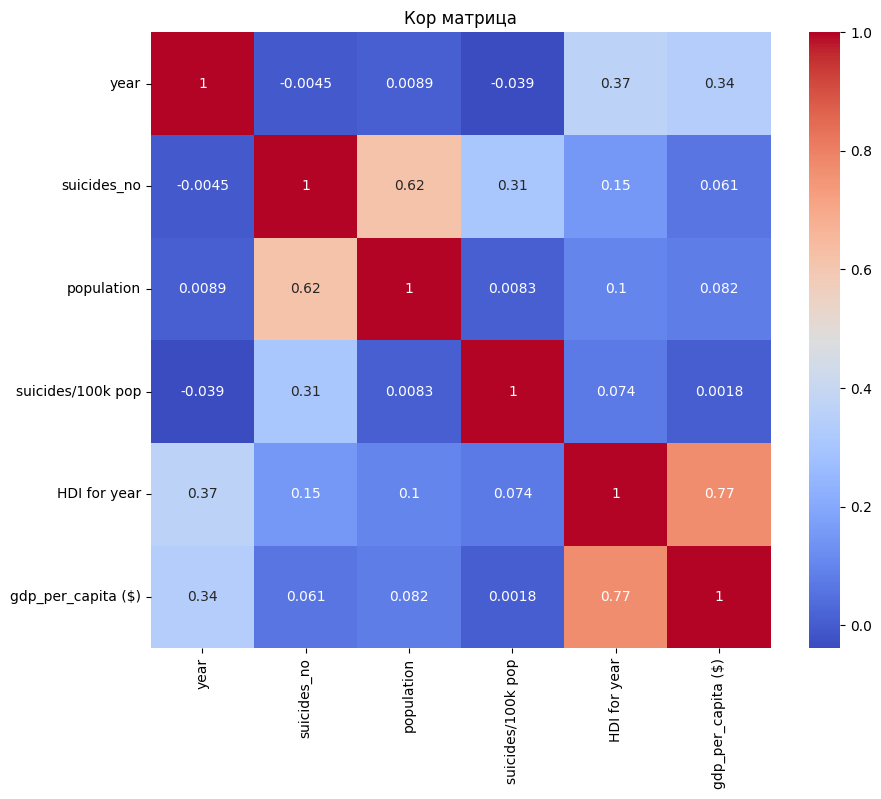

In [37]:
#Получение кор матрицы для понимания зависимости
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Кор матрица')
plt.show()

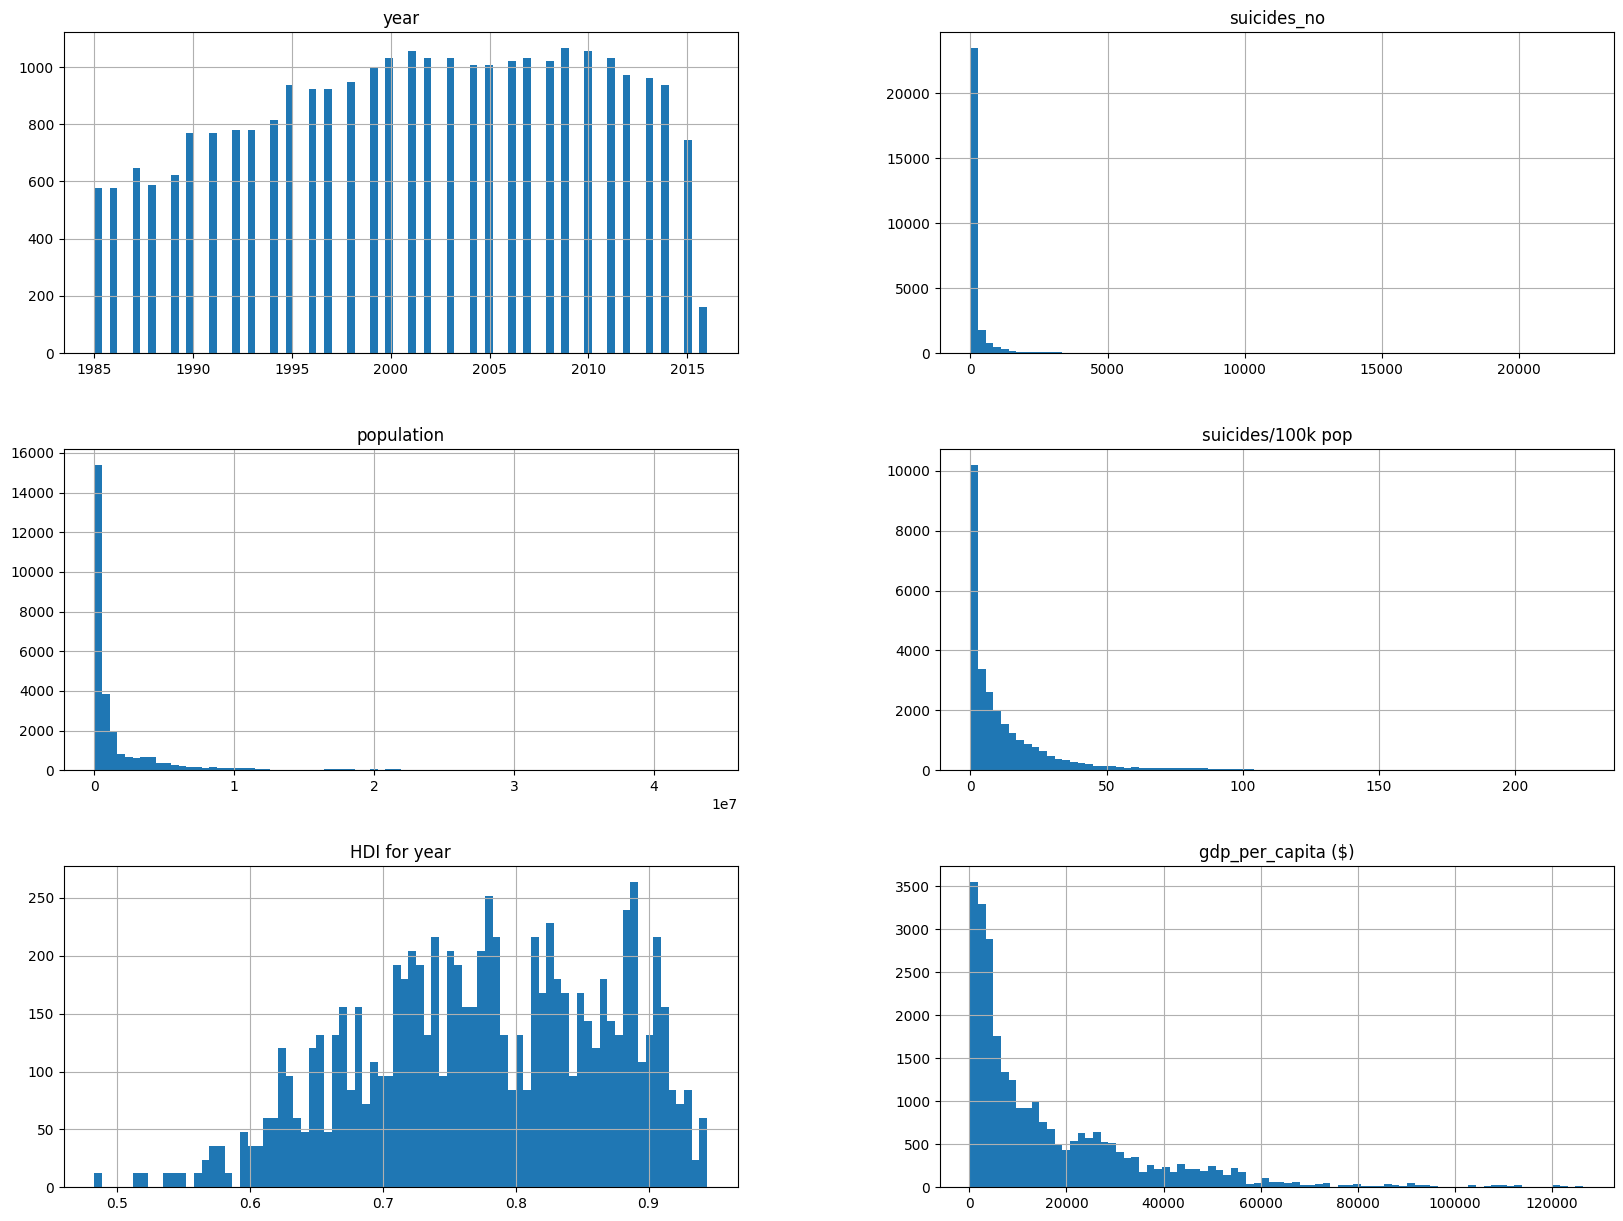

In [38]:
numeric_data.hist(bins=80, figsize=(20,15))
plt.show()

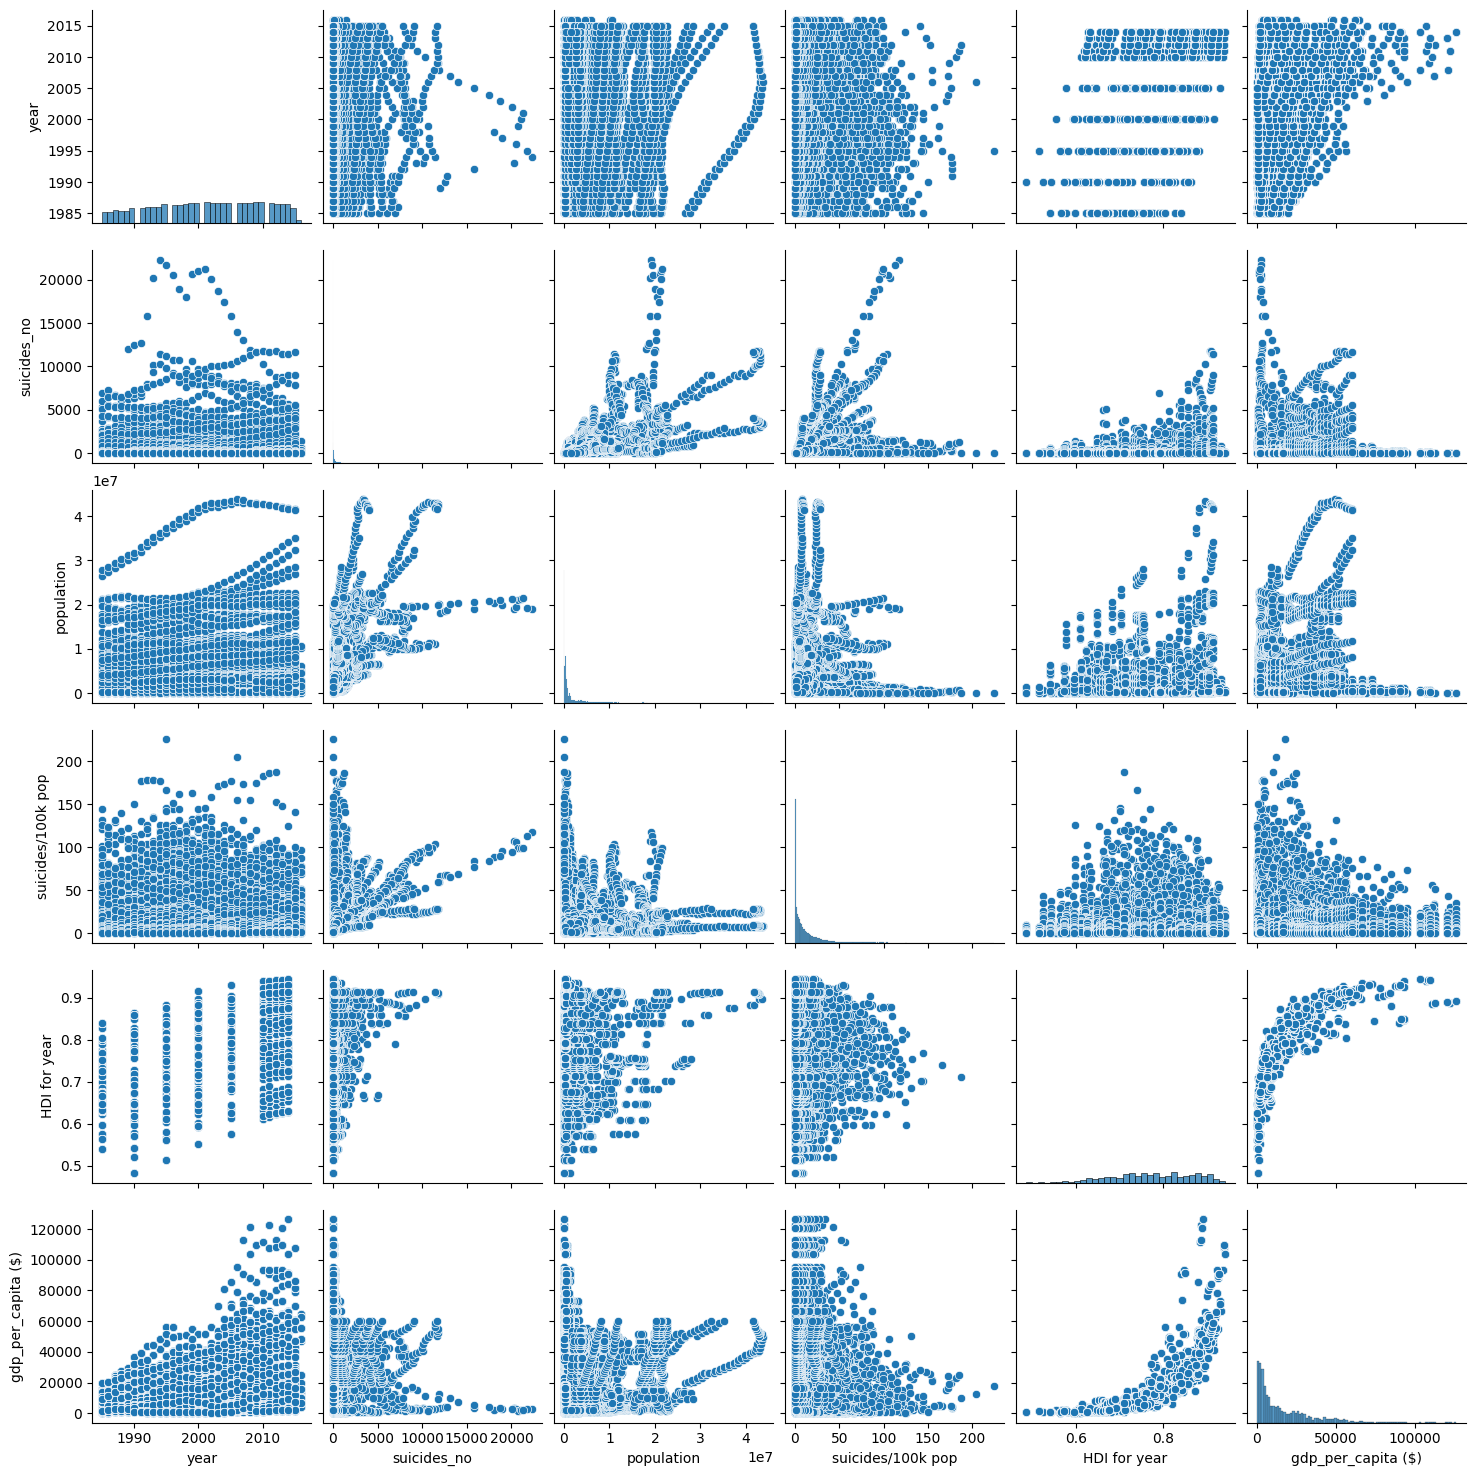

In [39]:
sns.pairplot(numeric_data)
plt.show()

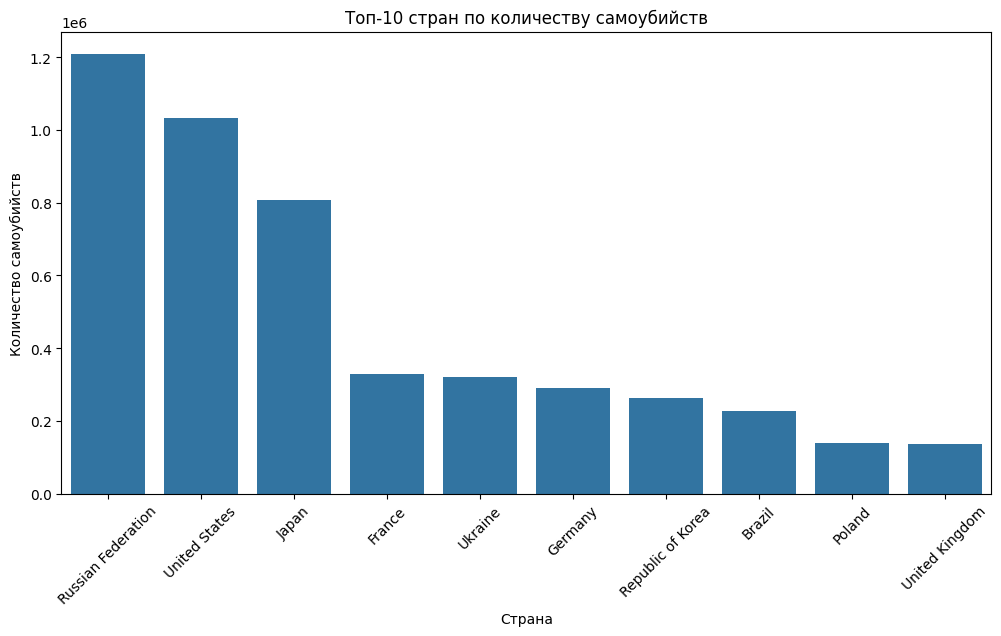

In [40]:
suicides_by_country = data.groupby('country')['suicides_no'].sum().reset_index()

top_10_countries = suicides_by_country.sort_values(by='suicides_no', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='country', y='suicides_no')
plt.title('Топ-10 стран по количеству самоубийств')
plt.xlabel('Страна')
plt.ylabel('Количество самоубийств')
plt.xticks(rotation=45)
plt.show()

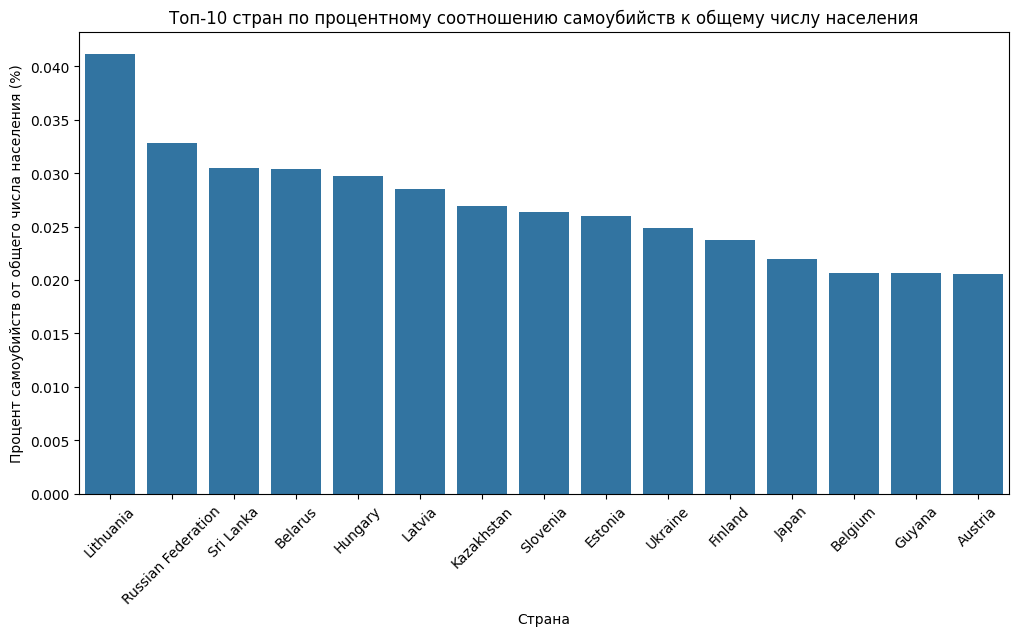

In [41]:
population_by_country = data.groupby('country')['population'].sum().reset_index()
merged_data = pd.merge(suicides_by_country, population_by_country, on='country', how='inner')
merged_data['suicides_percent'] = (merged_data['suicides_no'] / merged_data['population']) * 100

top_10_countries_percent = merged_data.sort_values(by='suicides_percent', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries_percent, x='country', y='suicides_percent')
plt.title('Топ-10 стран по процентному соотношению самоубийств к общему числу населения')
plt.xlabel('Страна')
plt.ylabel('Процент самоубийств от общего числа населения (%)')
plt.xticks(rotation=45)
plt.show()

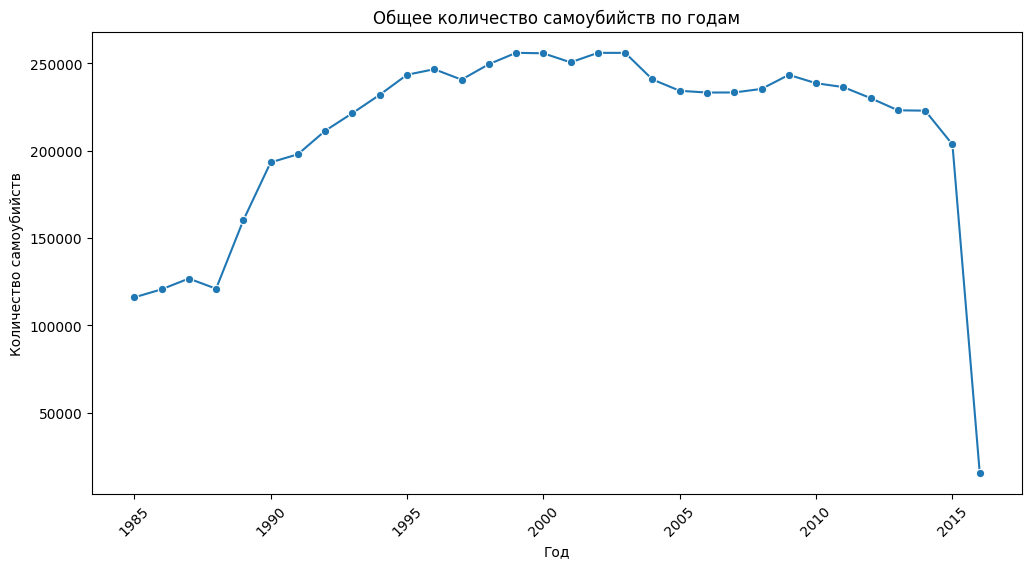

In [42]:
suicides_by_year = data.groupby('year')['suicides_no'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=suicides_by_year, x='year', y='suicides_no', marker='o')
plt.title('Общее количество самоубийств по годам')
plt.xlabel('Год')
plt.ylabel('Количество самоубийств')
plt.xticks(rotation=45)
plt.show()

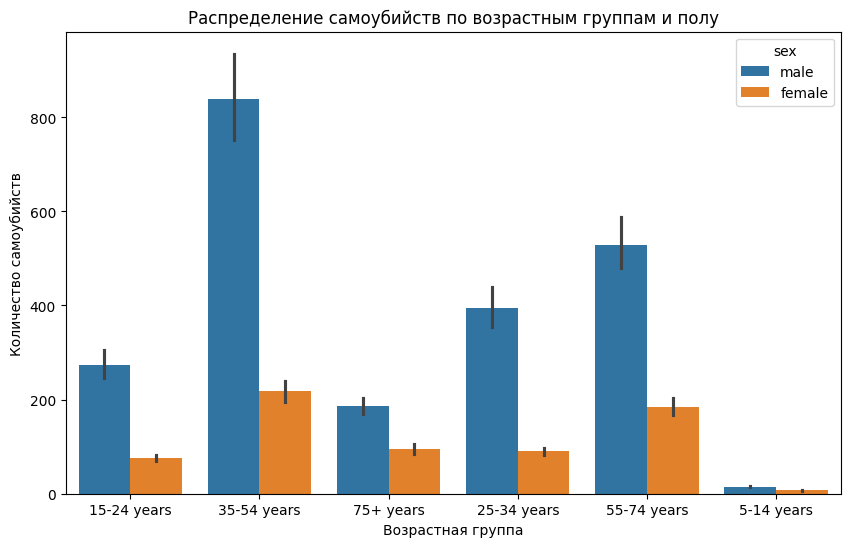

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='age', y='suicides_no', hue='sex')
plt.title('Распределение самоубийств по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество самоубийств')
plt.show()

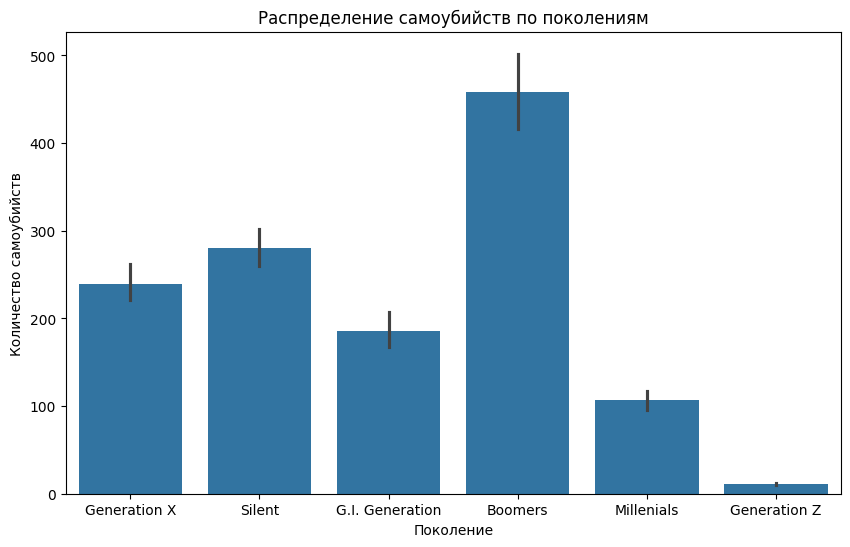

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='generation', y='suicides_no')
plt.title('Распределение самоубийств по поколениям')
plt.xlabel('Поколение')
plt.ylabel('Количество самоубийств')
plt.show()

In [45]:
suicides_by_country_sex = data.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()
male_suicides = suicides_by_country_sex[suicides_by_country_sex['sex'] == 'male'].nlargest(10, 'suicides_no')
female_suicides = suicides_by_country_sex[suicides_by_country_sex['sex'] == 'female'].nlargest(10, 'suicides_no')
print("\n10 стран с наибольшим количеством самоубийств среди мужчин:")
print(male_suicides)
print("\n10 стран с наибольшим количеством самоубийств среди женщин:")
print(female_suicides)


10 стран с наибольшим количеством самоубийств среди мужчин:
                country   sex  suicides_no
151  Russian Federation  male       995412
197       United States  male       820216
93                Japan  male       555272
191             Ukraine  male       258573
67               France  male       239708
71              Germany  male       211555
147   Republic of Korea  male       179115
31               Brazil  male       177598
139              Poland  male       118035
195      United Kingdom  male       104118

10 стран с наибольшим количеством самоубийств среди женщин:
                country     sex  suicides_no
92                Japan  female       251630
150  Russian Federation  female       214330
196       United States  female       213797
66               France  female        89419
146   Republic of Korea  female        82615
70              Germany  female        79707
190             Ukraine  female        61377
30               Brazil  female        49015


In [46]:
country_population = data.groupby('country')['population'].sum().reset_index()
country_sex_suicides = data.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()
country_total_suicides = country_sex_suicides.groupby('country')['suicides_no'].sum().reset_index()
country_sex_suicides = pd.merge(country_sex_suicides, country_total_suicides, on='country', suffixes=('', '_total'))
country_sex_suicides['suicide_percentage'] = (country_sex_suicides['suicides_no'] / country_sex_suicides['suicides_no_total']) * 100
country_sex_population = data.groupby(['country', 'sex'])['population'].sum().reset_index()
country_population_total = country_sex_population.groupby('country')['population'].sum().reset_index()
country_sex_population = pd.merge(country_sex_population, country_population_total, on='country', suffixes=('', '_total'))
country_sex_population['population_percentage'] = (country_sex_population['population'] / country_sex_population['population_total']) * 100

print("Количество людей в каждой стране:")
print(country_population)
print("\nПроцентное соотношение мужчин и женщин в каждой стране:")
print(country_sex_population)
print("\nПроцент мужчин и женщин, совершающих самоубийства в каждой стране:")
print(country_sex_suicides)

Количество людей в каждой стране:
                  country  population
0                 Albania    62325467
1     Antigua and Barbuda     1990228
2               Argentina  1035985431
3                 Armenia    77348173
4                   Aruba     1259677
..                    ...         ...
96   United Arab Emirates    36502275
97         United Kingdom  1738767780
98          United States  8054027201
99                Uruguay    84068943
100            Uzbekistan   486422532

[101 rows x 2 columns]

Процентное соотношение мужчин и женщин в каждой стране:
                 country     sex  population  population_total  \
0                Albania  female    31301599          62325467   
1                Albania    male    31023868          62325467   
2    Antigua and Barbuda  female     1039175           1990228   
3    Antigua and Barbuda    male      951053           1990228   
4              Argentina  female   529728151        1035985431   
..                   ...     ... 

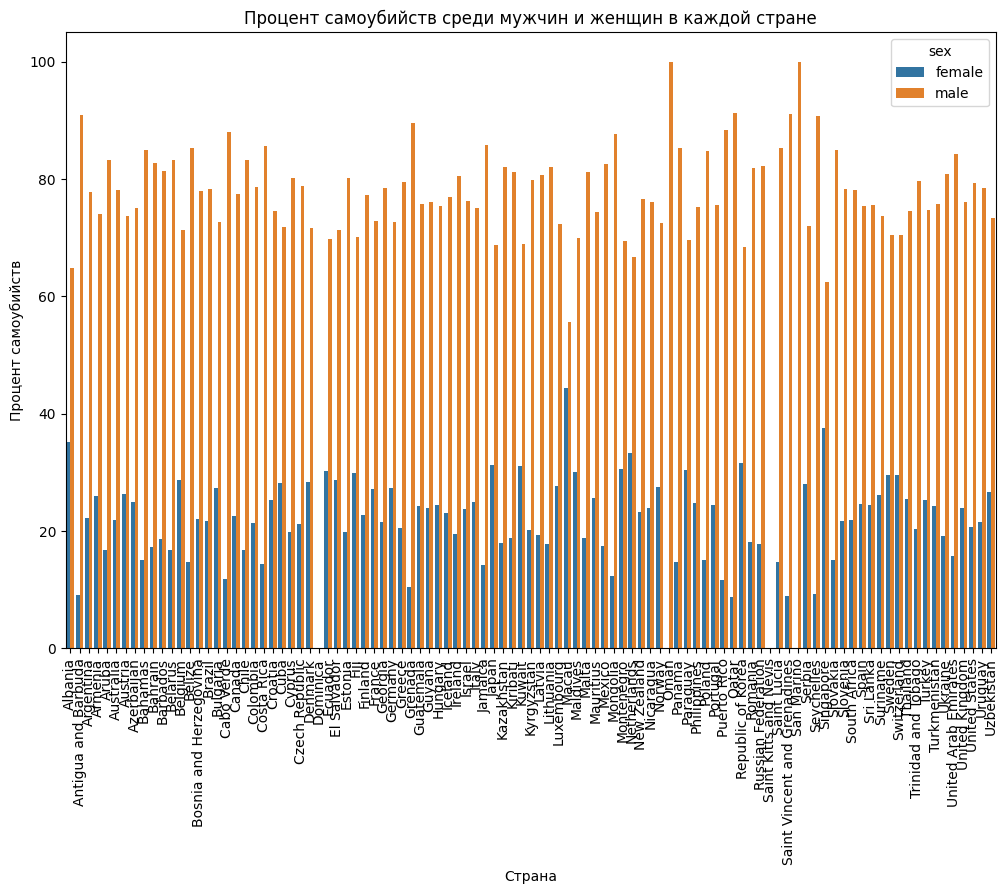

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(data=country_sex_suicides, x='country', y='suicide_percentage', hue='sex')
plt.title('Процент самоубийств среди мужчин и женщин в каждой стране')
plt.xlabel('Страна')
plt.ylabel('Процент самоубийств')
plt.xticks(rotation=90)
plt.show()

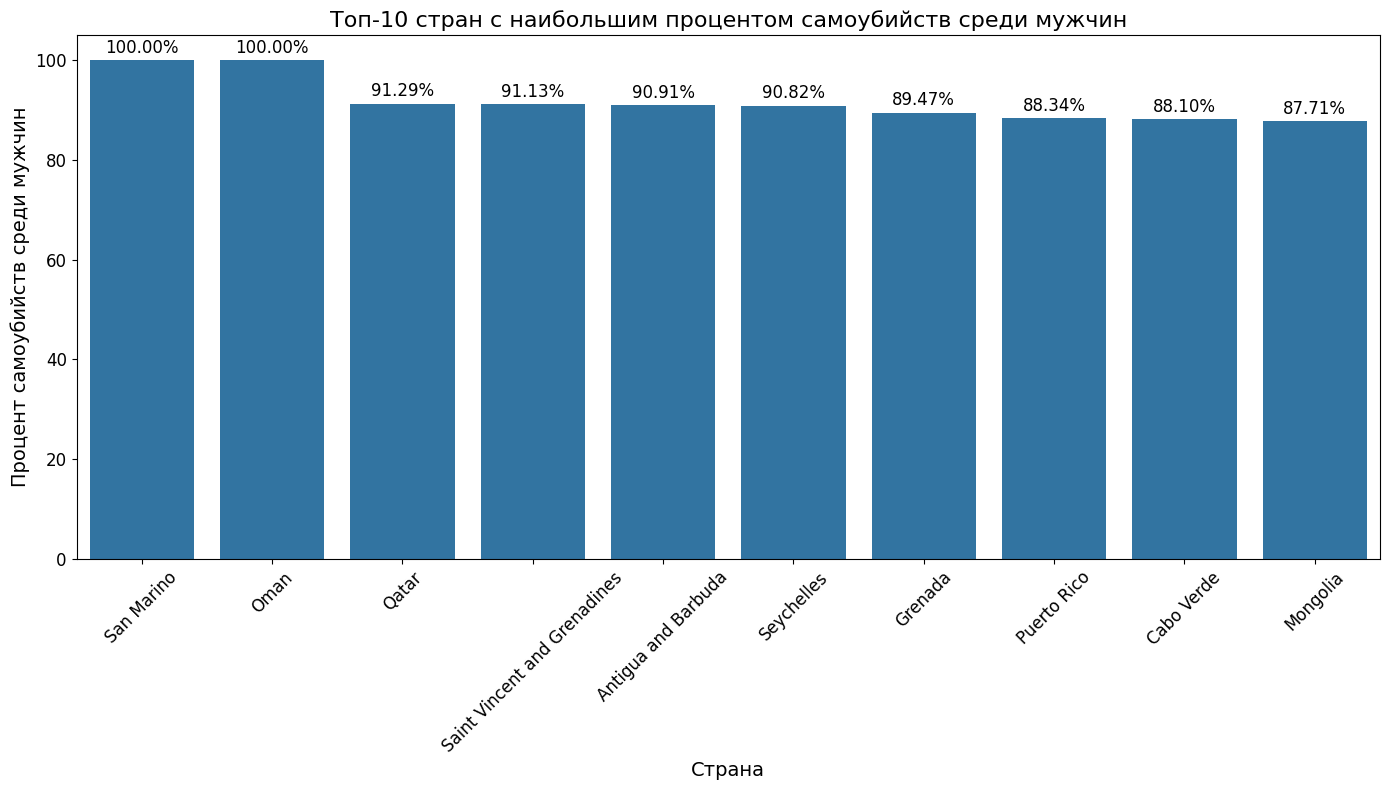

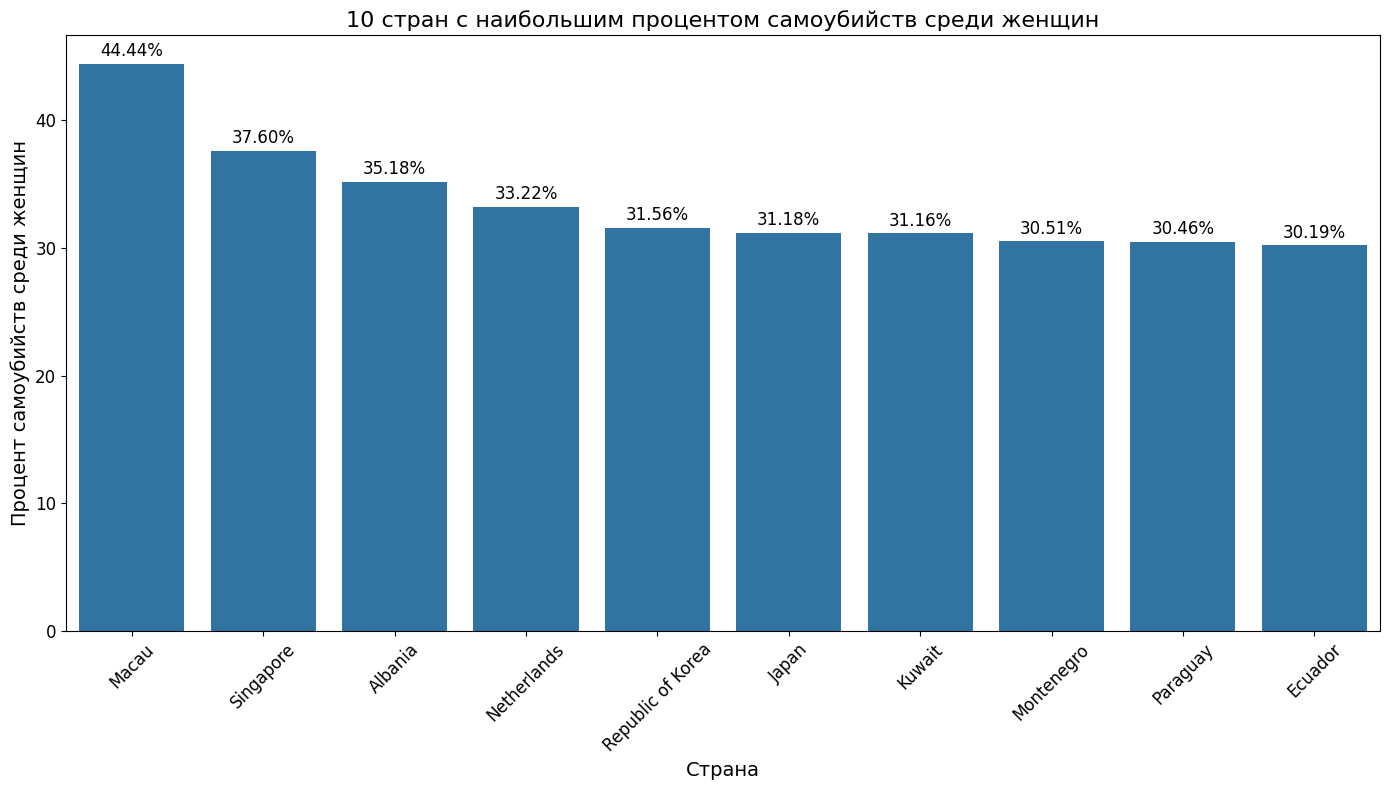

In [48]:
country_sex_suicides = data.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()
country_total_suicides = country_sex_suicides.groupby('country')['suicides_no'].sum().reset_index()
country_sex_suicides = pd.merge(country_sex_suicides, country_total_suicides, on='country', suffixes=('', '_total'))
country_sex_suicides['suicide_percentage'] = (country_sex_suicides['suicides_no'] / country_sex_suicides['suicides_no_total']) * 100
men_suicides = country_sex_suicides[country_sex_suicides['sex'] == 'male'].sort_values('suicide_percentage', ascending=False).head(10)
women_suicides = country_sex_suicides[country_sex_suicides['sex'] == 'female'].sort_values('suicide_percentage', ascending=False).head(10)

def add_annotations(ax, data, x_col, y_col):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)
#male
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=men_suicides, x='country', y='suicide_percentage')
plt.title('Топ-10 стран с наибольшим процентом самоубийств среди мужчин', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Процент самоубийств среди мужчин', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
add_annotations(ax, men_suicides, 'country', 'suicide_percentage')
plt.tight_layout()
plt.show()
#female
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=women_suicides, x='country', y='suicide_percentage')
plt.title('10 стран с наибольшим процентом самоубийств среди женщин', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Процент самоубийств среди женщин', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
add_annotations(ax, women_suicides, 'country', 'suicide_percentage')
plt.tight_layout()
plt.show()

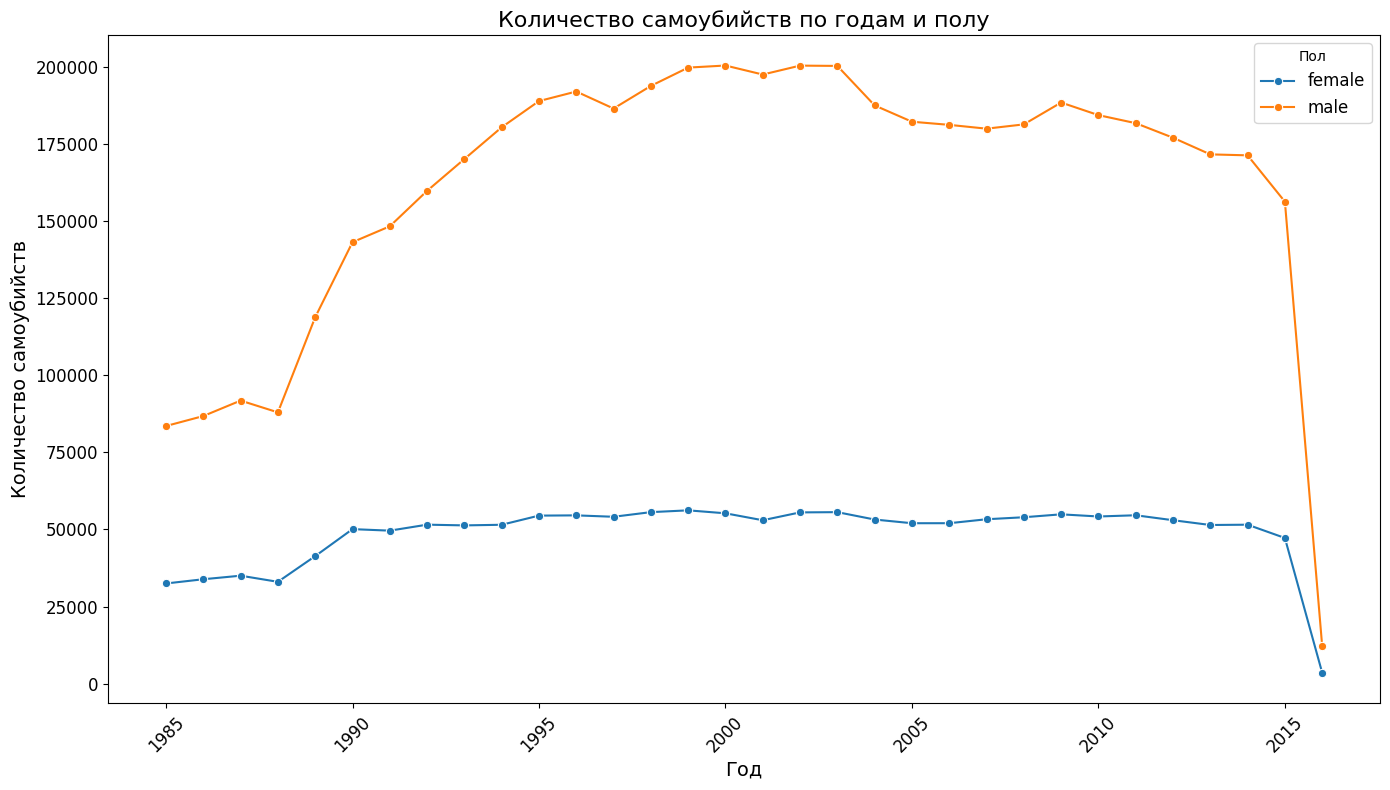

In [49]:
year_sex_suicides = data.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=year_sex_suicides, x='year', y='suicides_no', hue='sex', marker='o')
plt.title('Количество самоубийств по годам и полу', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество самоубийств', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Пол', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


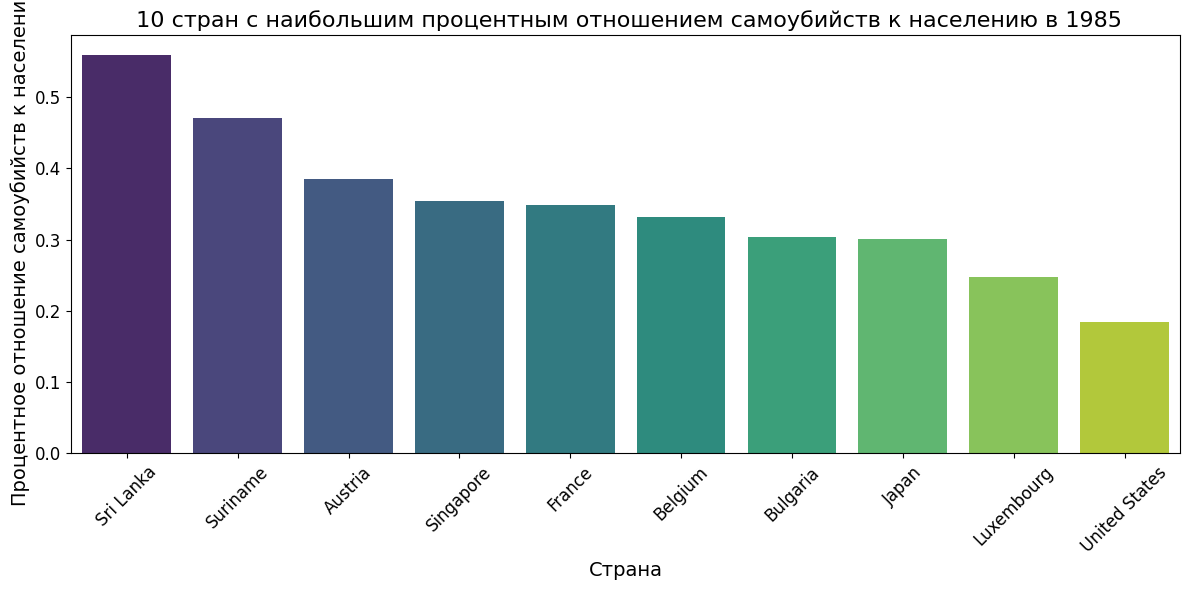

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


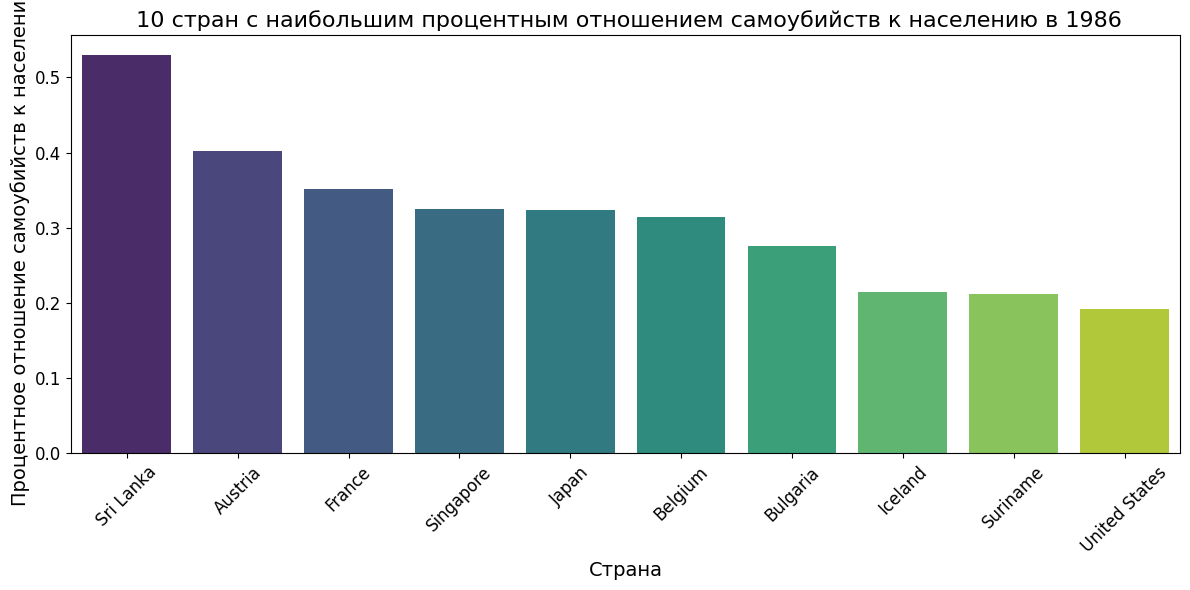

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


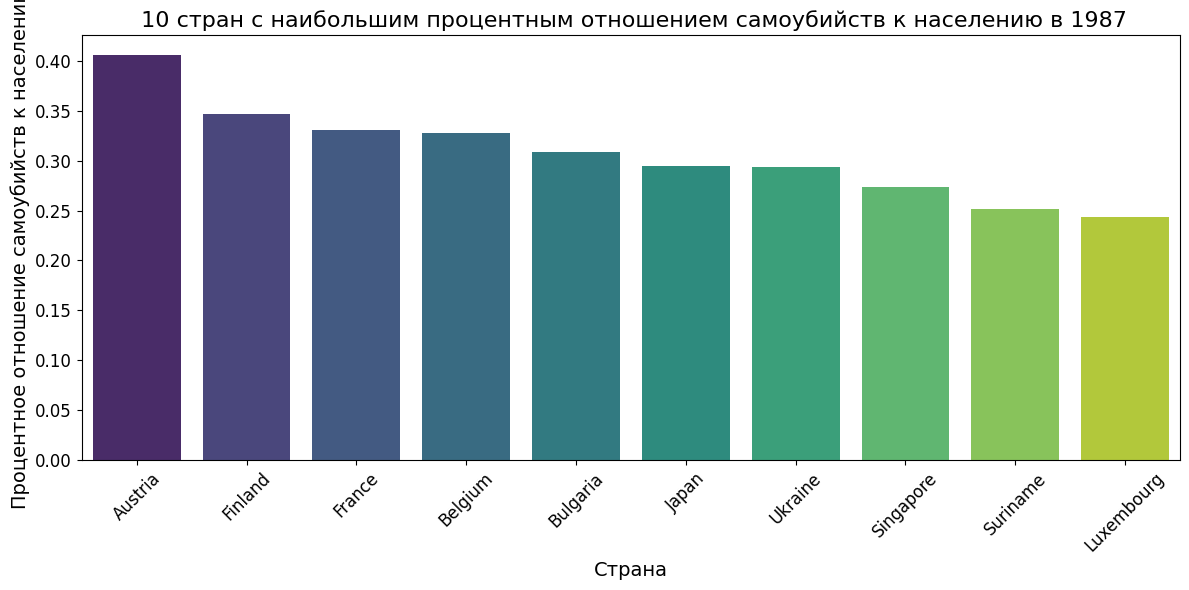

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


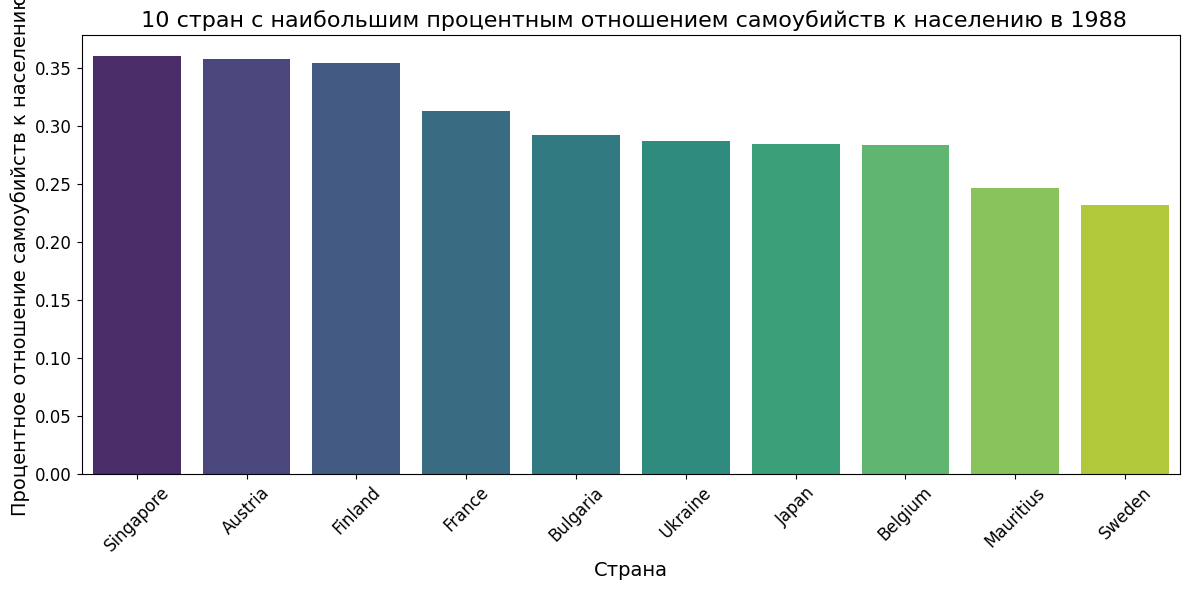

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


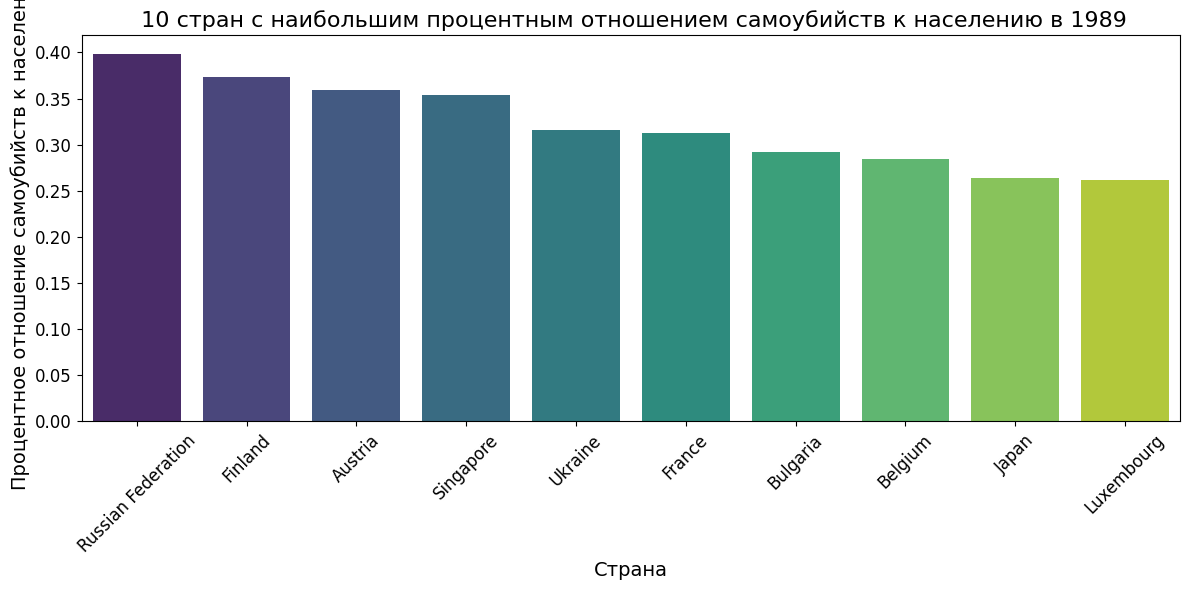

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


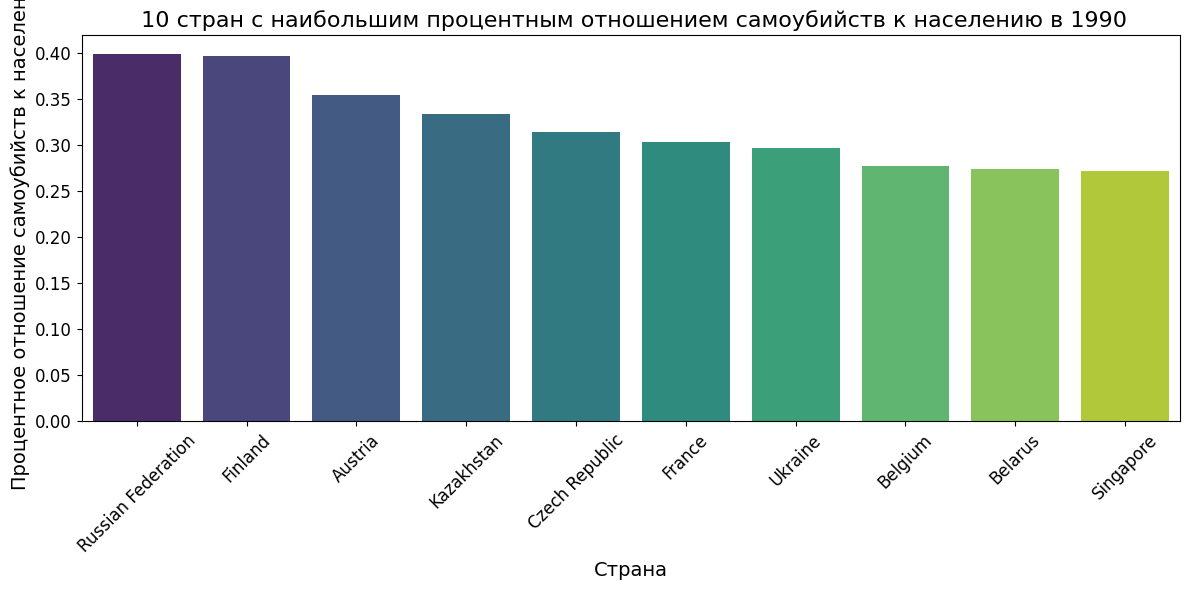

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


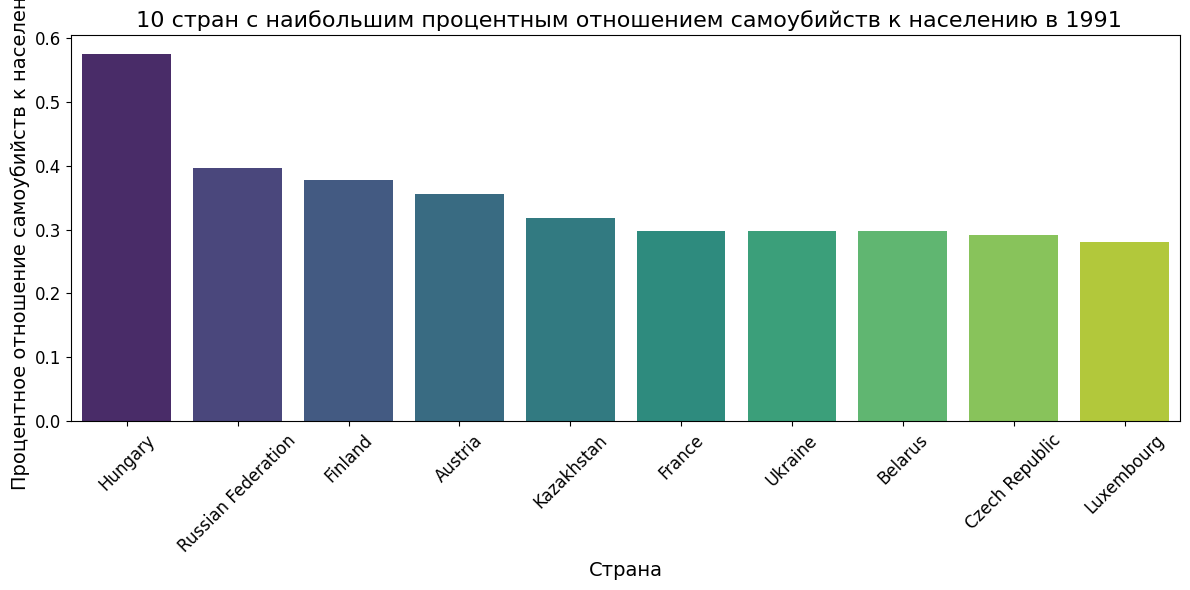

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


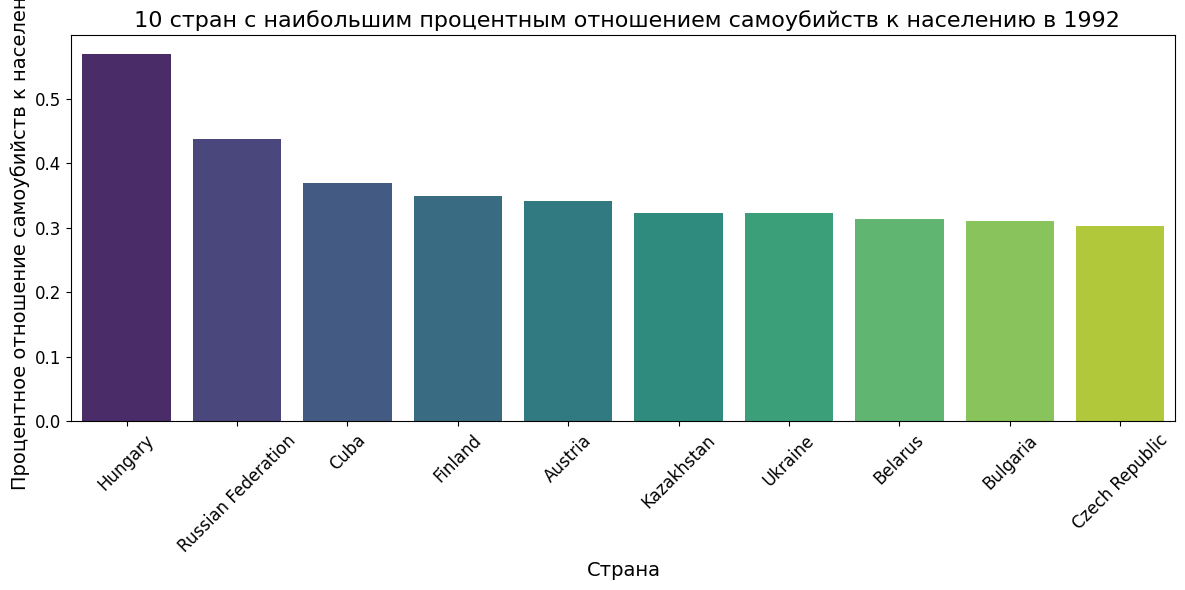

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


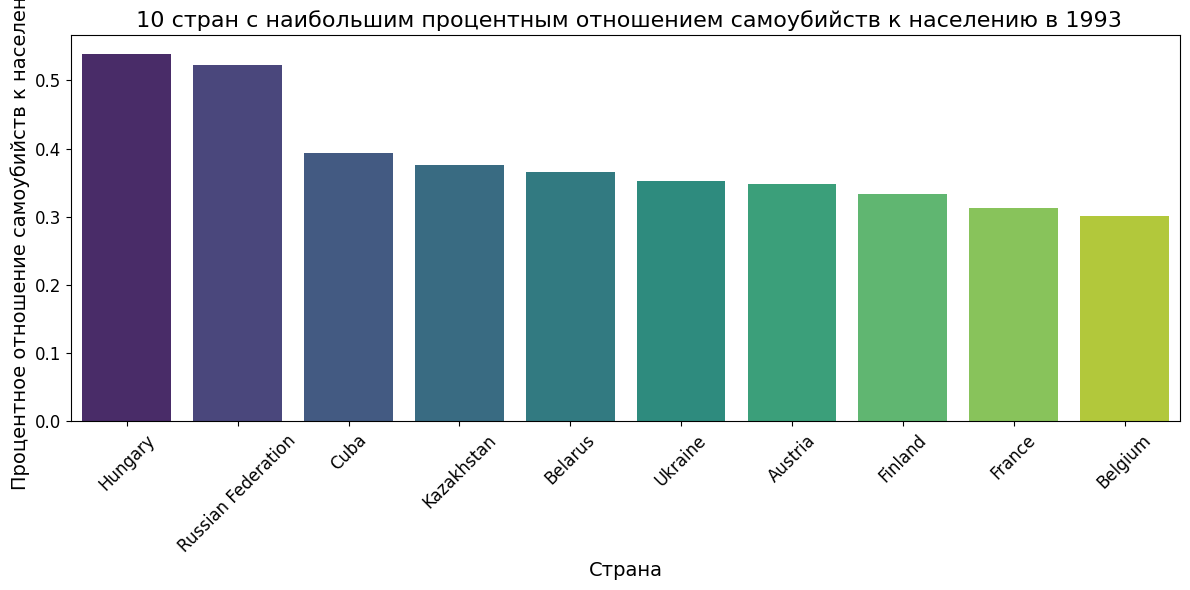

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


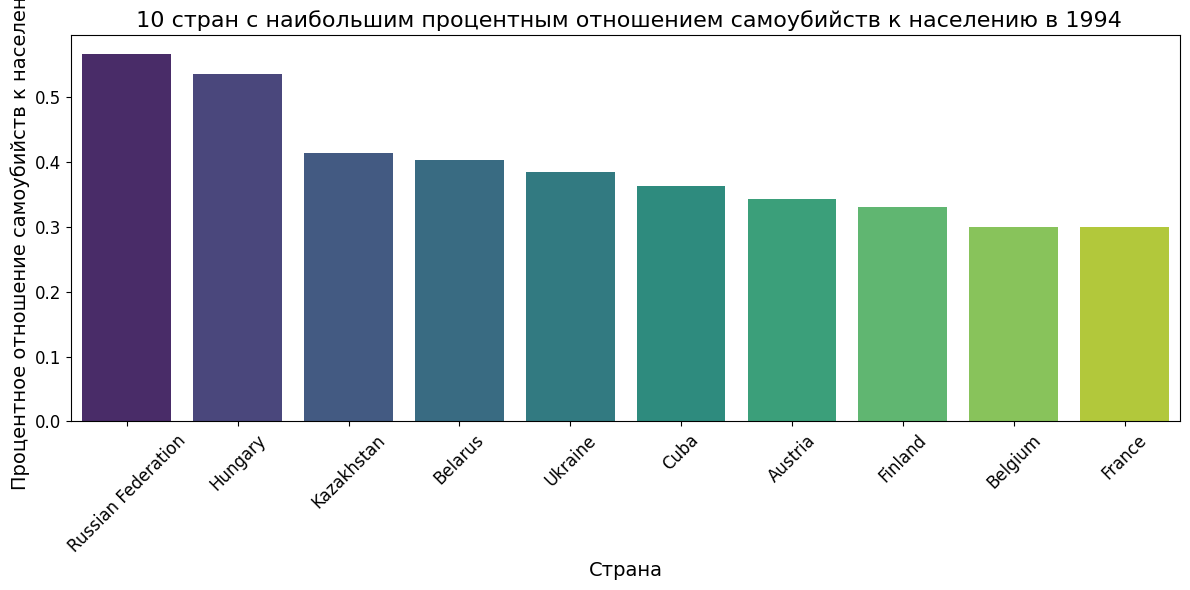

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


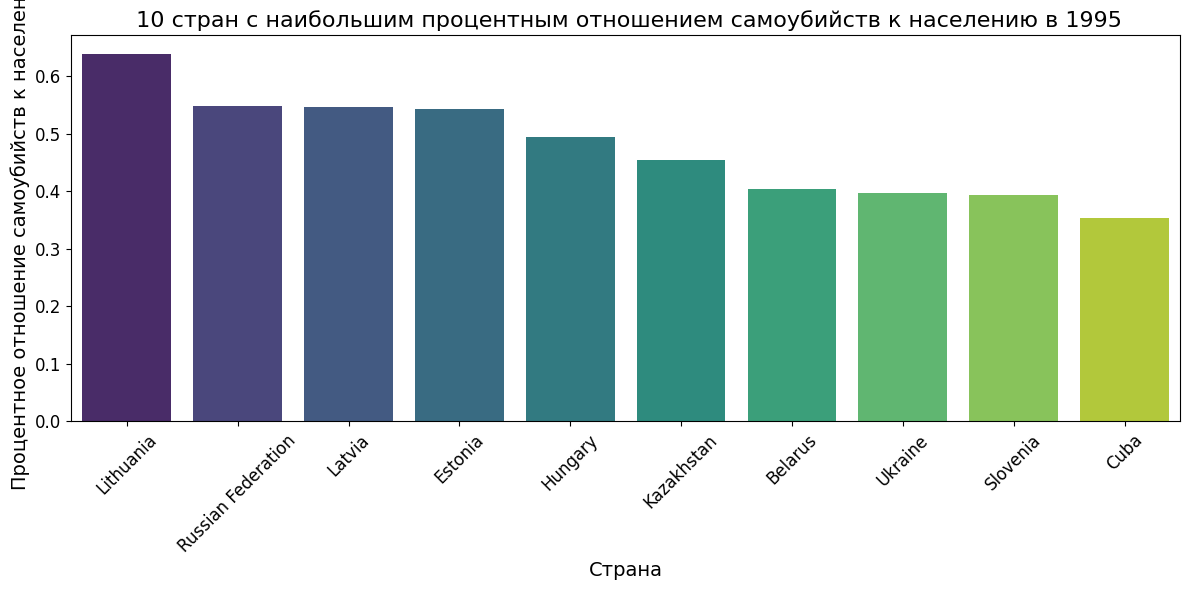

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


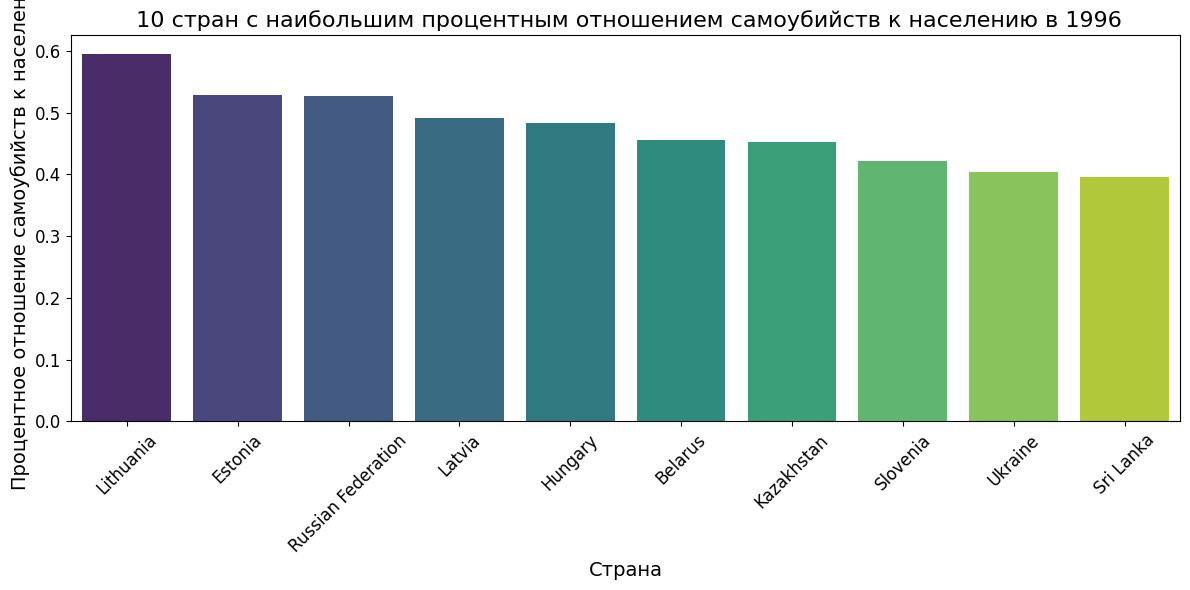

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


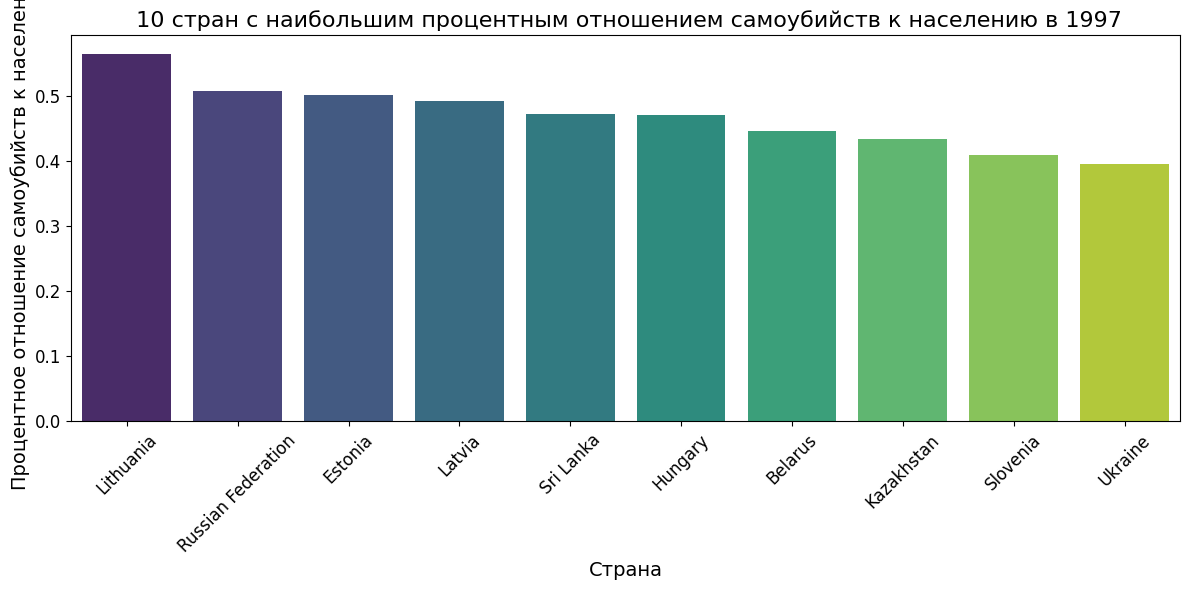

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


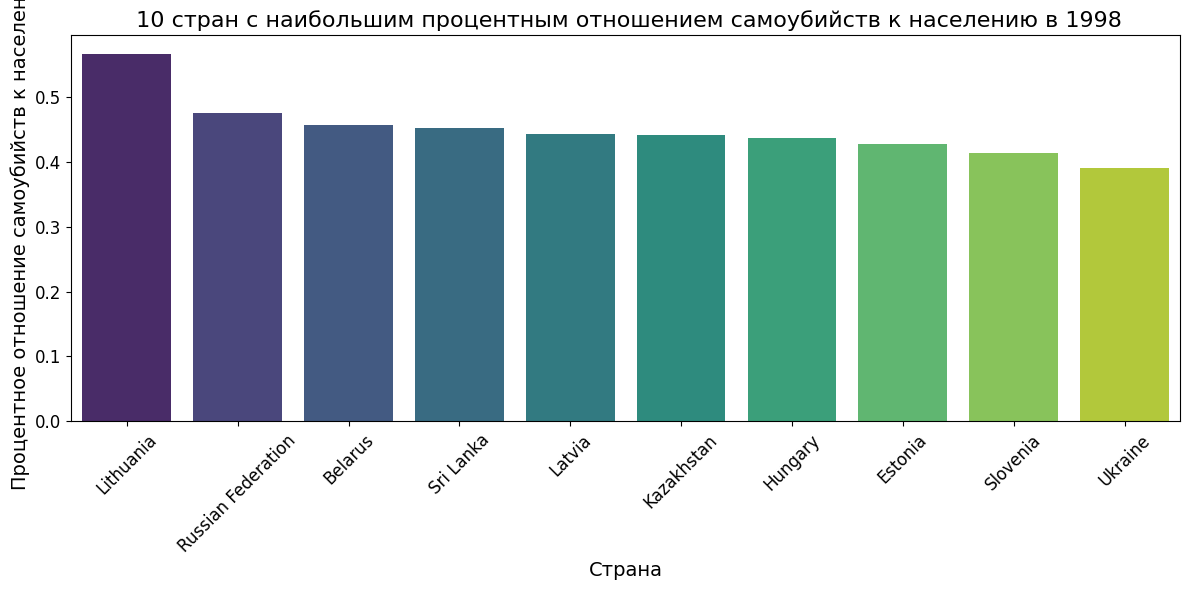

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


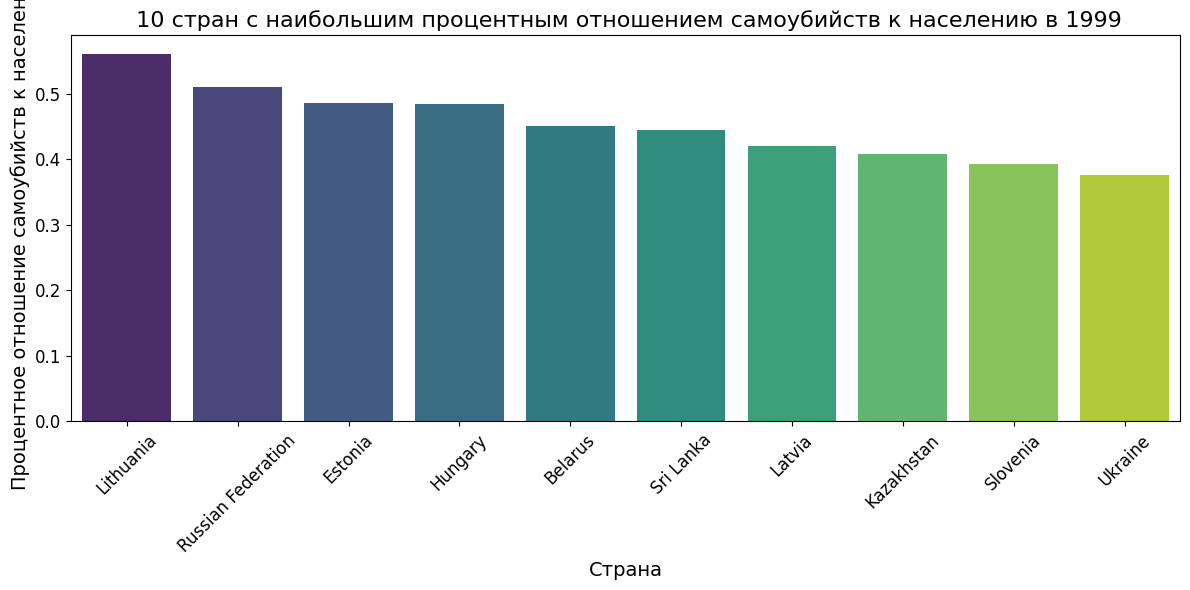

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


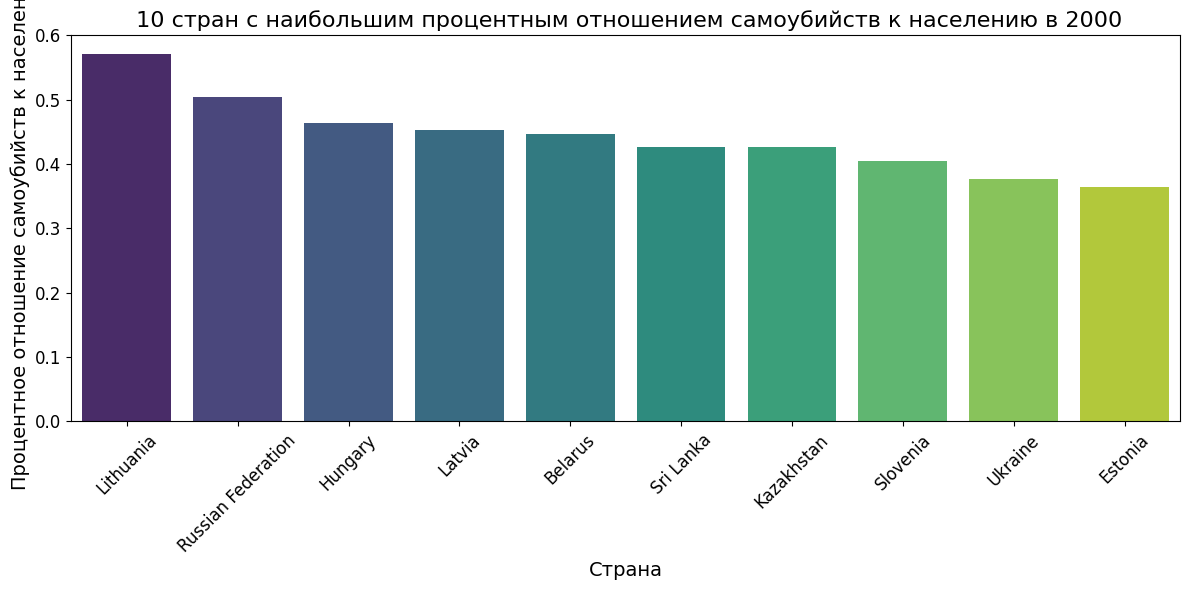

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


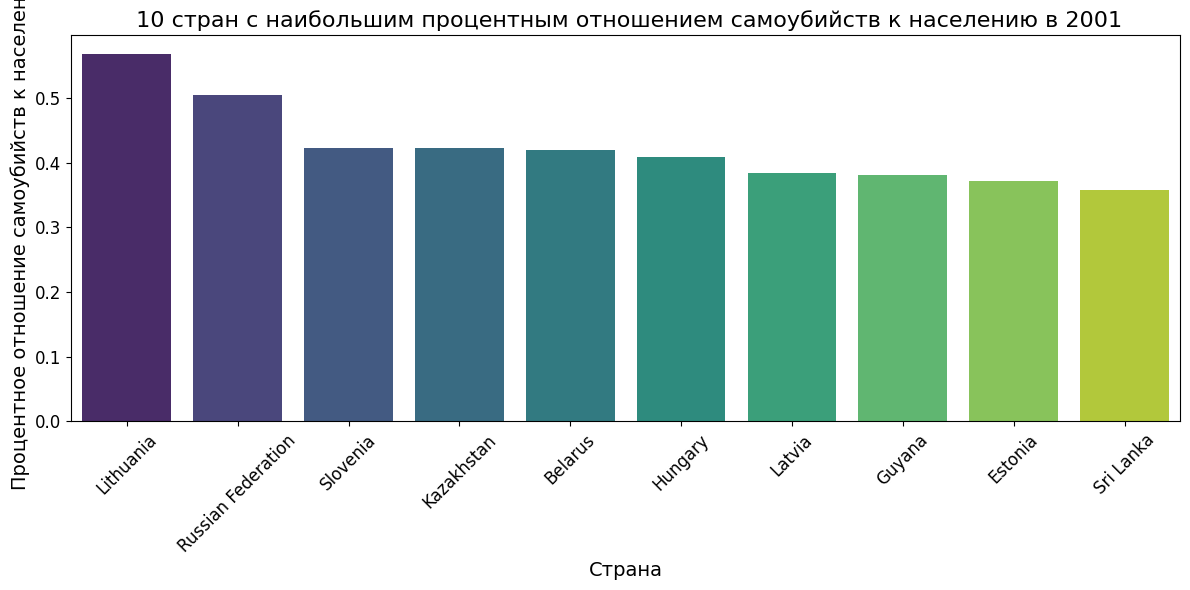

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


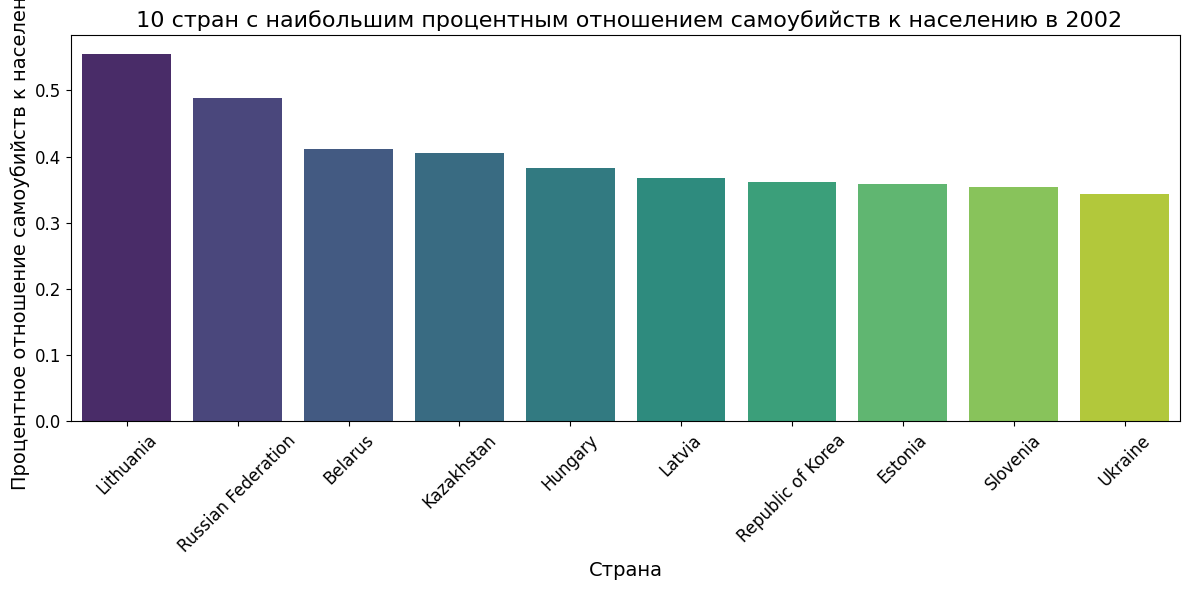

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


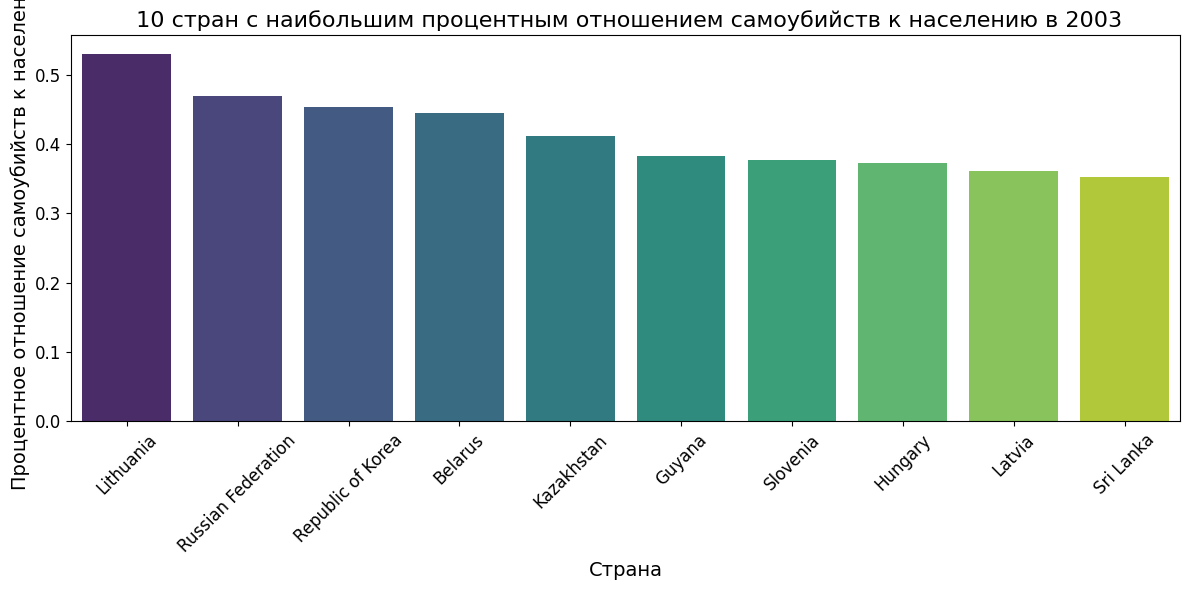

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


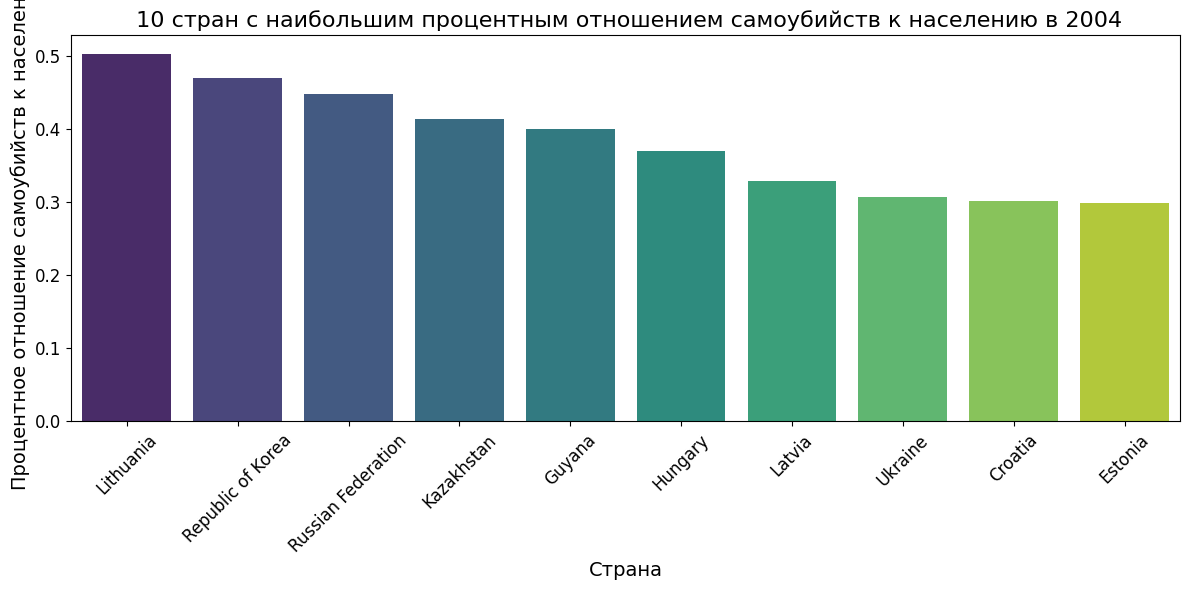

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


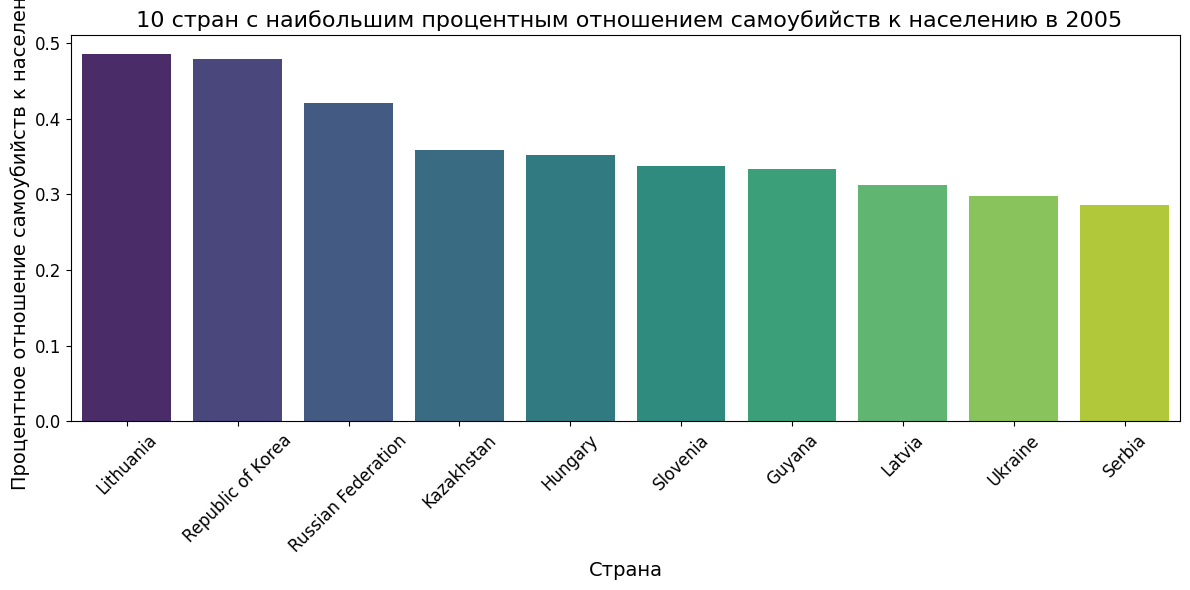

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


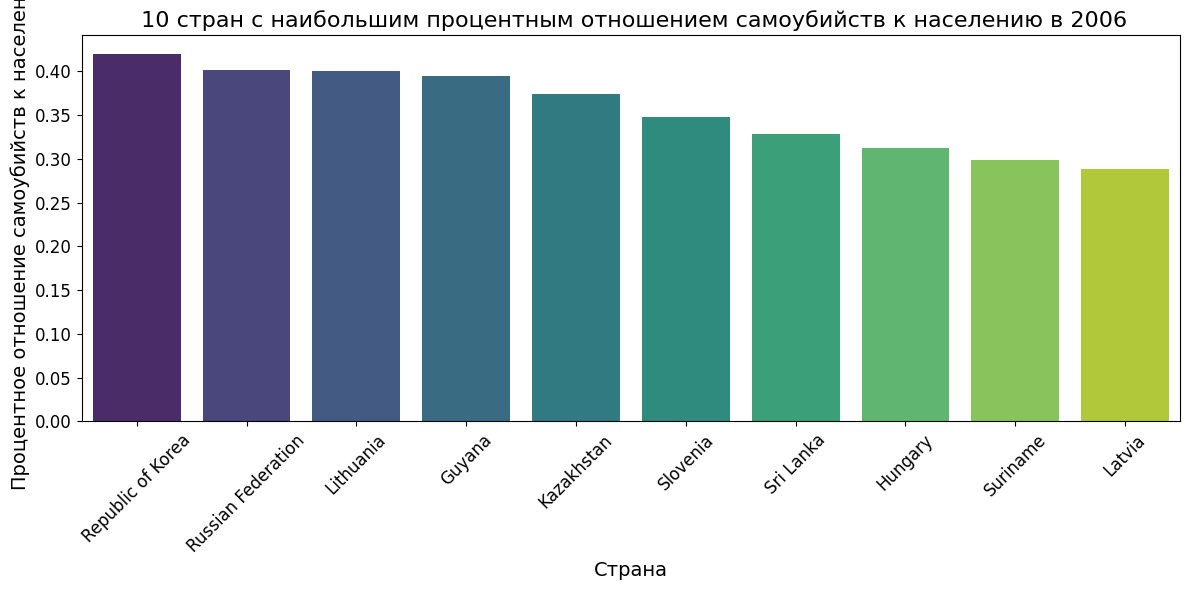

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


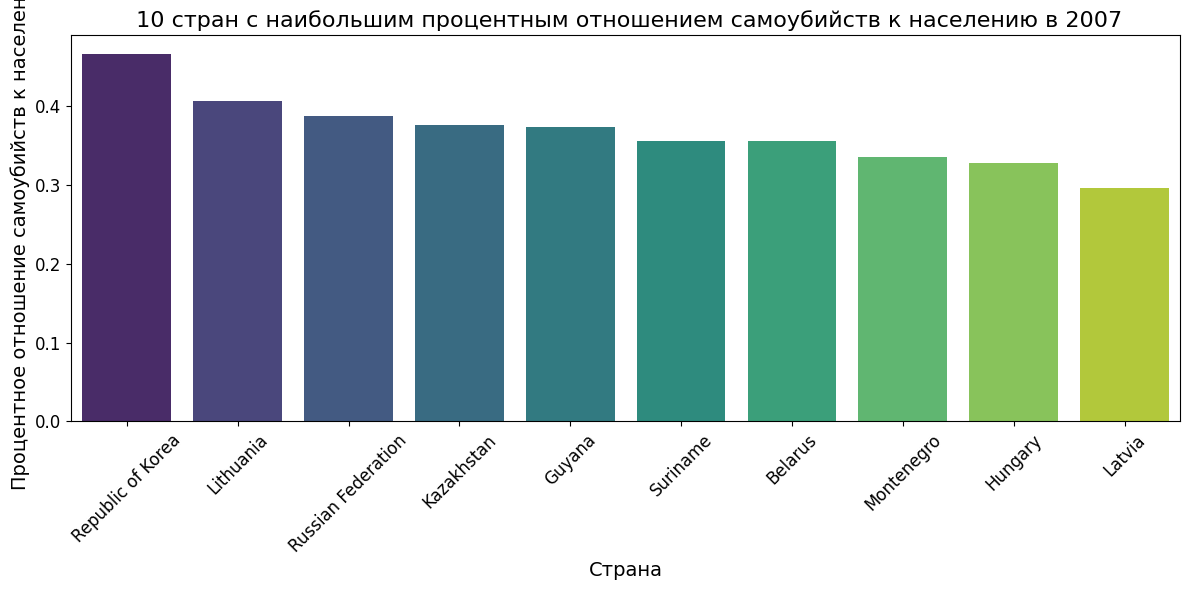

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


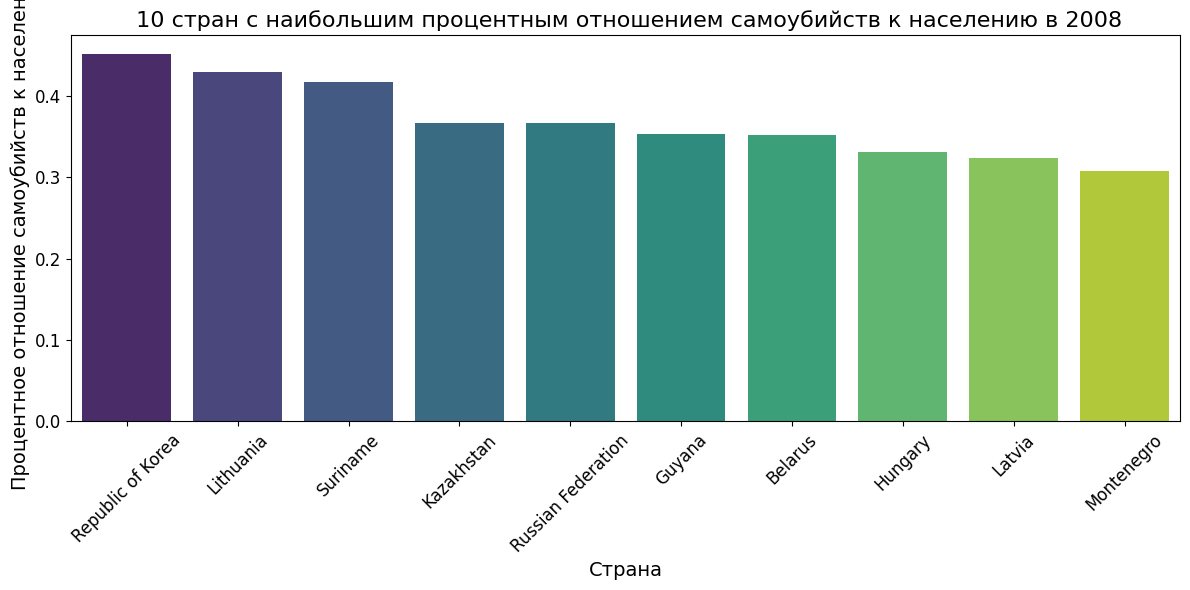

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


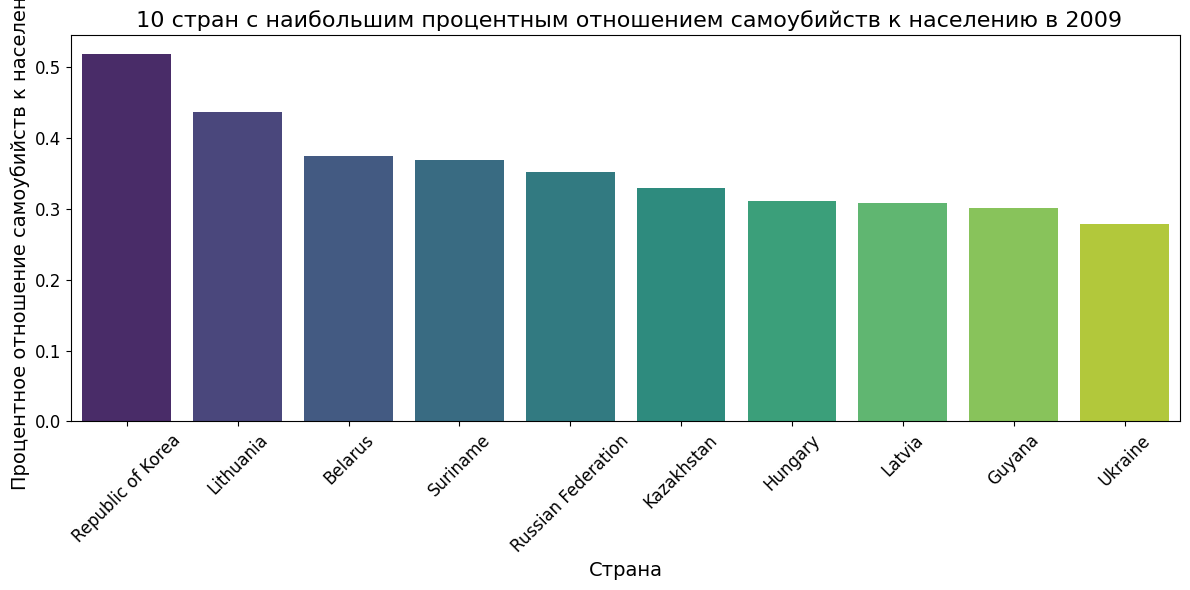

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


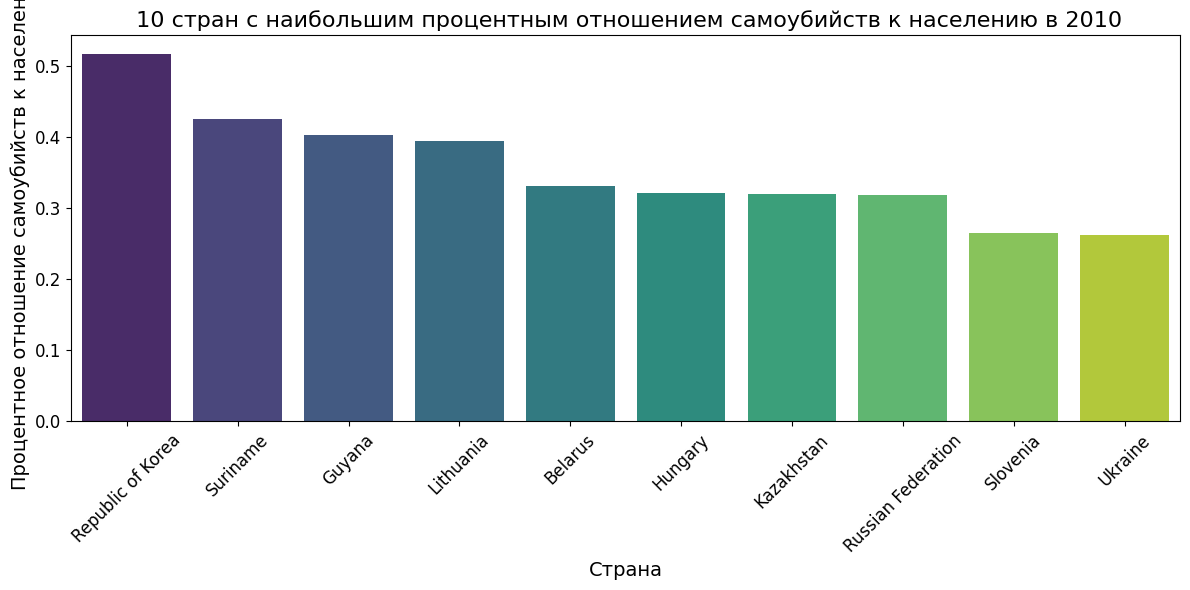

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


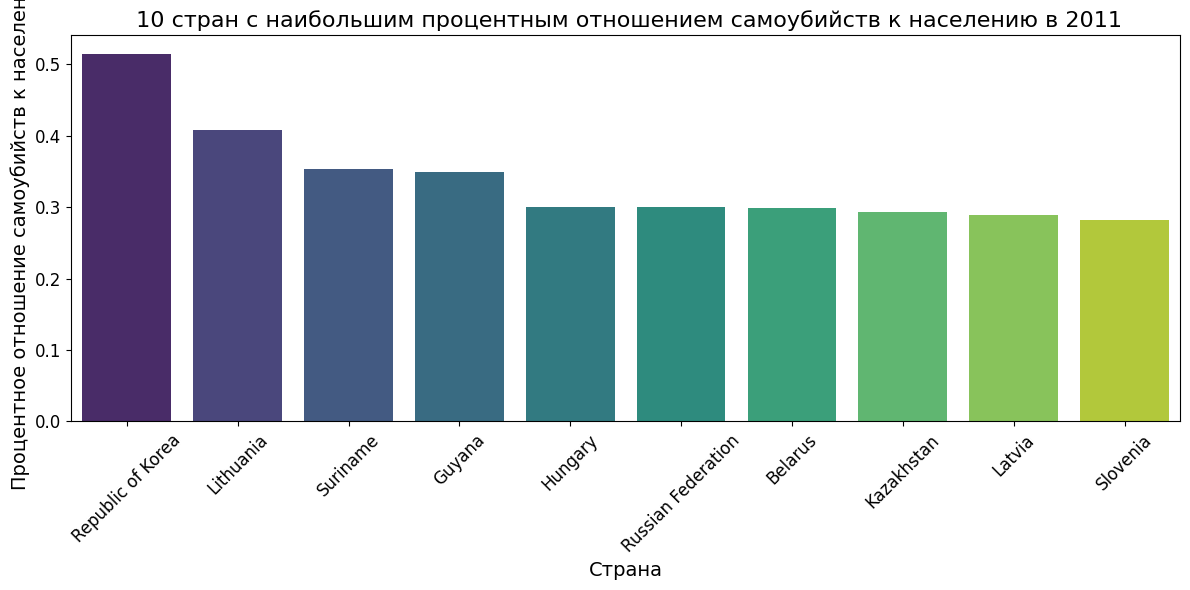

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


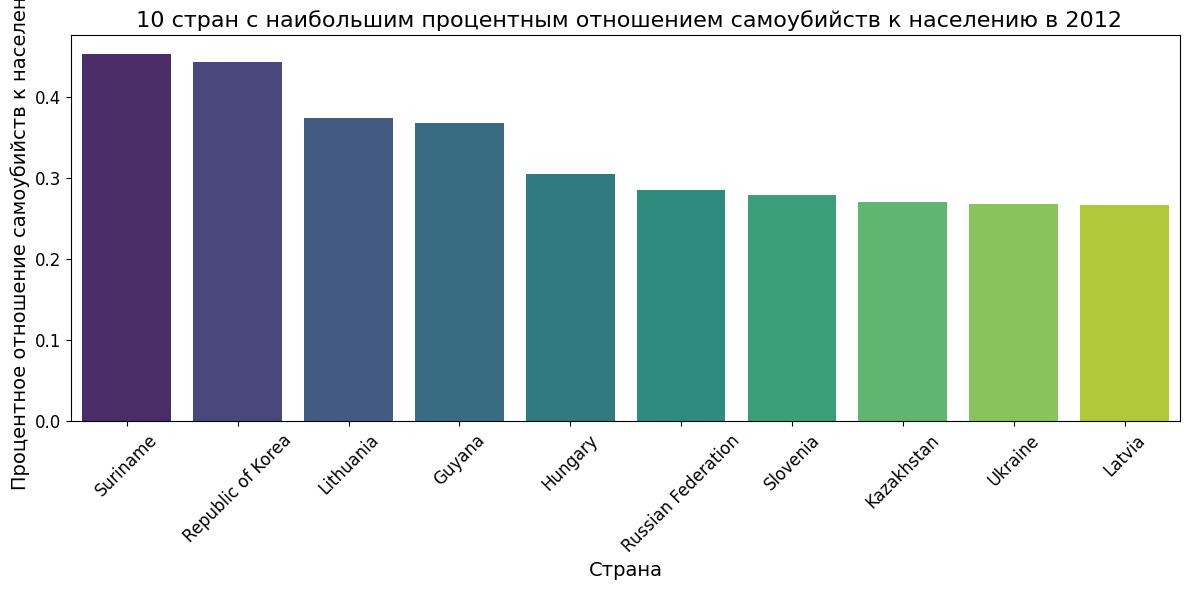

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


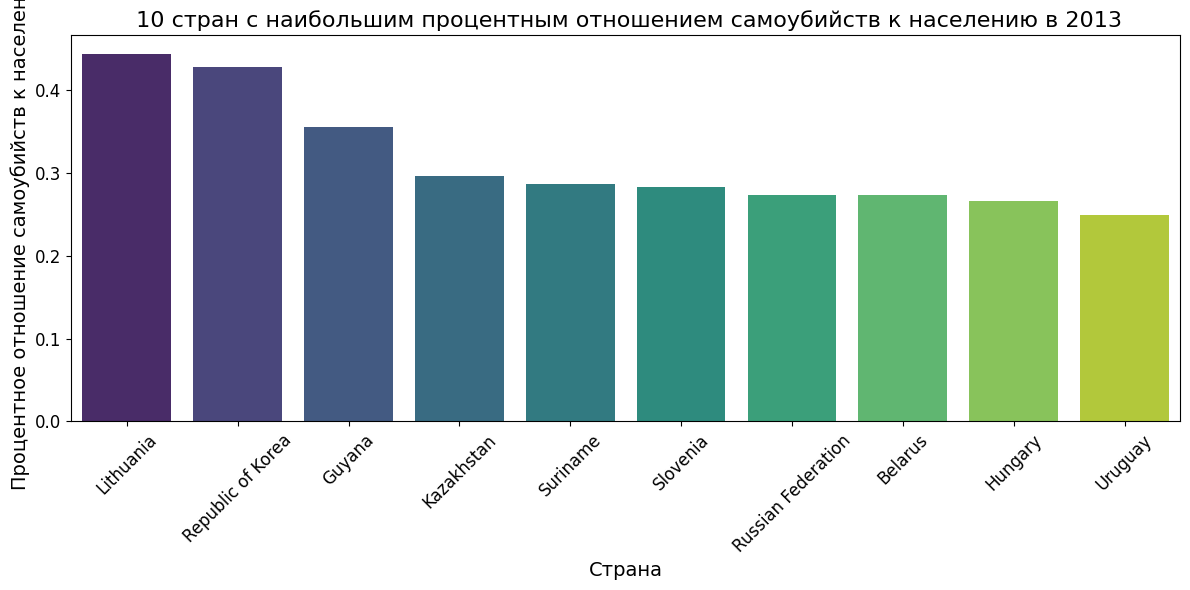

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


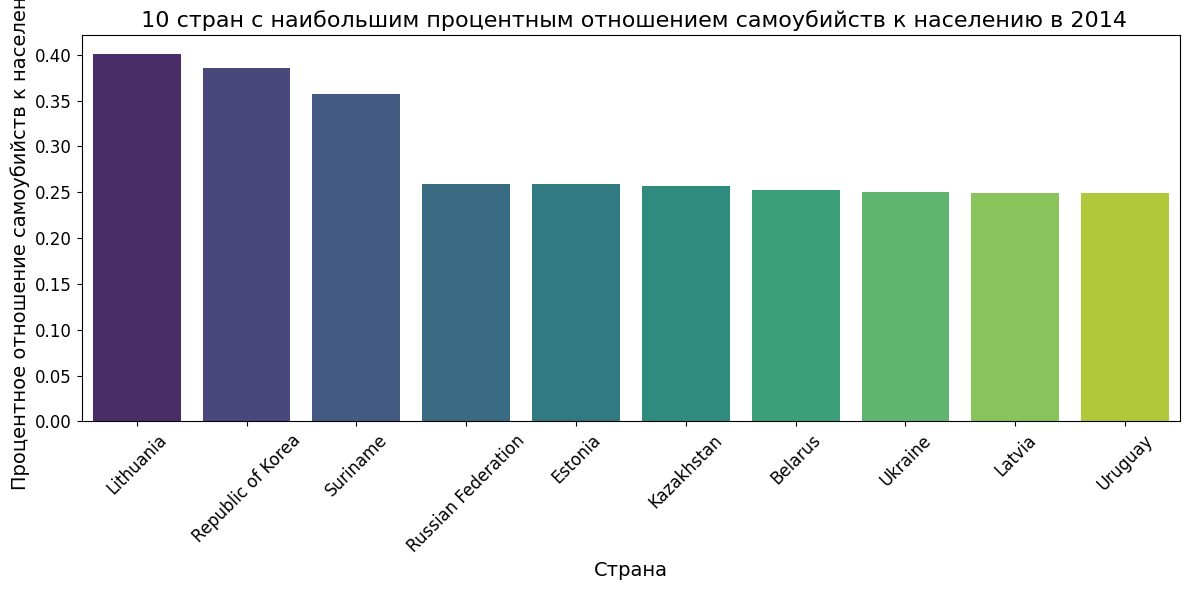

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


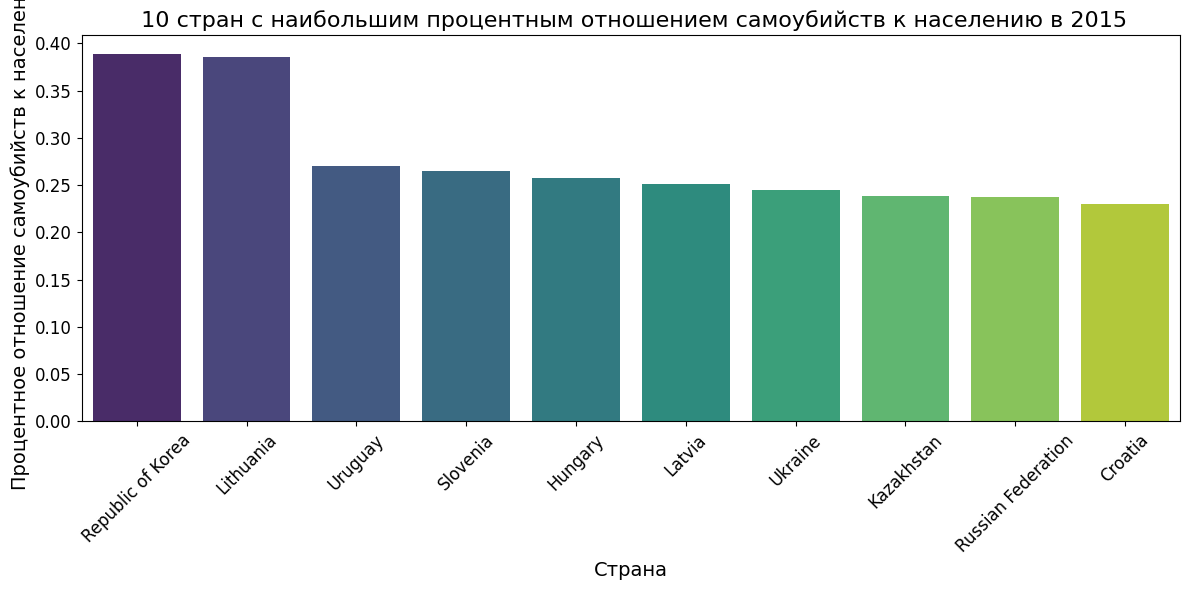

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1425889122.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')


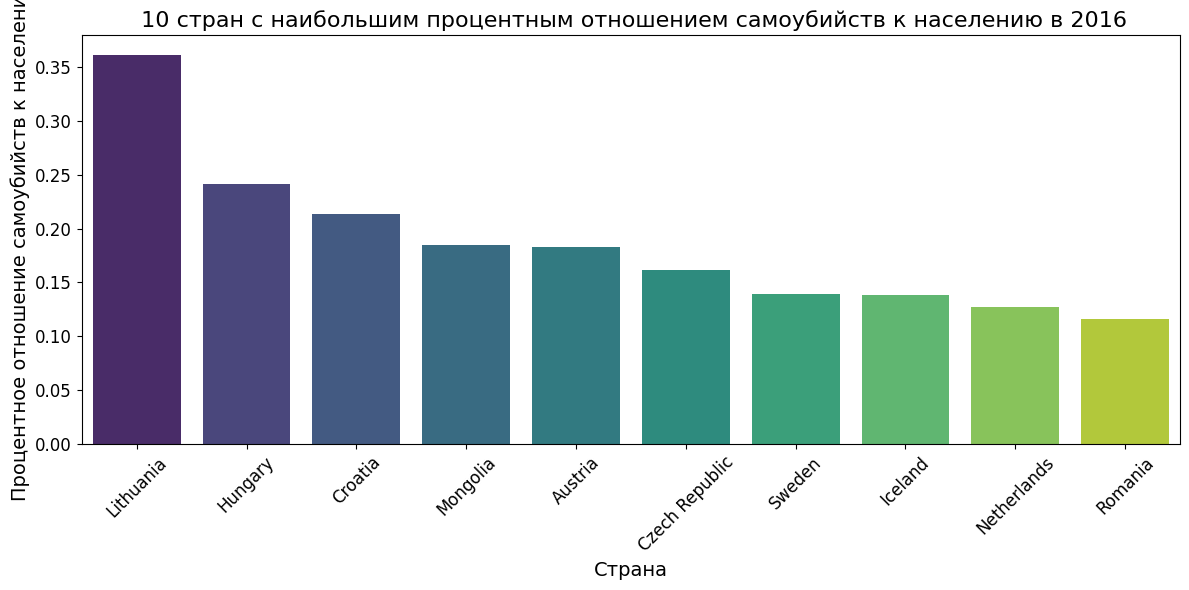

In [50]:
data['suicides_population_ratio'] = (data['suicides_no'] / data['population']) * 100
top_countries_by_year = data.groupby(['year', 'country'])['suicides_population_ratio'].sum().reset_index()
top_countries_by_year = top_countries_by_year.sort_values(['year', 'suicides_population_ratio'], ascending=[True, False])
top_countries_by_year = top_countries_by_year.groupby('year').head(10)

for year, group in top_countries_by_year.groupby('year'):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=group, x='country', y='suicides_population_ratio', palette='viridis')
    plt.title(f' 10 стран с наибольшим процентным отношением самоубийств к населению в {year}', fontsize=16)
    plt.xlabel('Страна', fontsize=14)
    plt.ylabel('Процентное отношение самоубийств к населению', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [51]:
suicides_by_year = data.groupby('year')['suicides_no'].sum().reset_index()
suicides_by_year = suicides_by_year.sort_values(by='suicides_no', ascending=False)
print(suicides_by_year)

    year  suicides_no
14  1999       256119
17  2002       256095
18  2003       256079
15  2000       255832
16  2001       250652
13  1998       249591
11  1996       246725
10  1995       243544
24  2009       243487
19  2004       240861
12  1997       240745
25  2010       238702
26  2011       236484
23  2008       235447
20  2005       234375
22  2007       233408
21  2006       233361
9   1994       232063
27  2012       230160
28  2013       223199
29  2014       222984
8   1993       221565
7   1992       211473
30  2015       203640
6   1991       198020
5   1990       193361
4   1989       160244
2   1987       126842
3   1988       121026
1   1986       120670
0   1985       116063
31  2016        15603


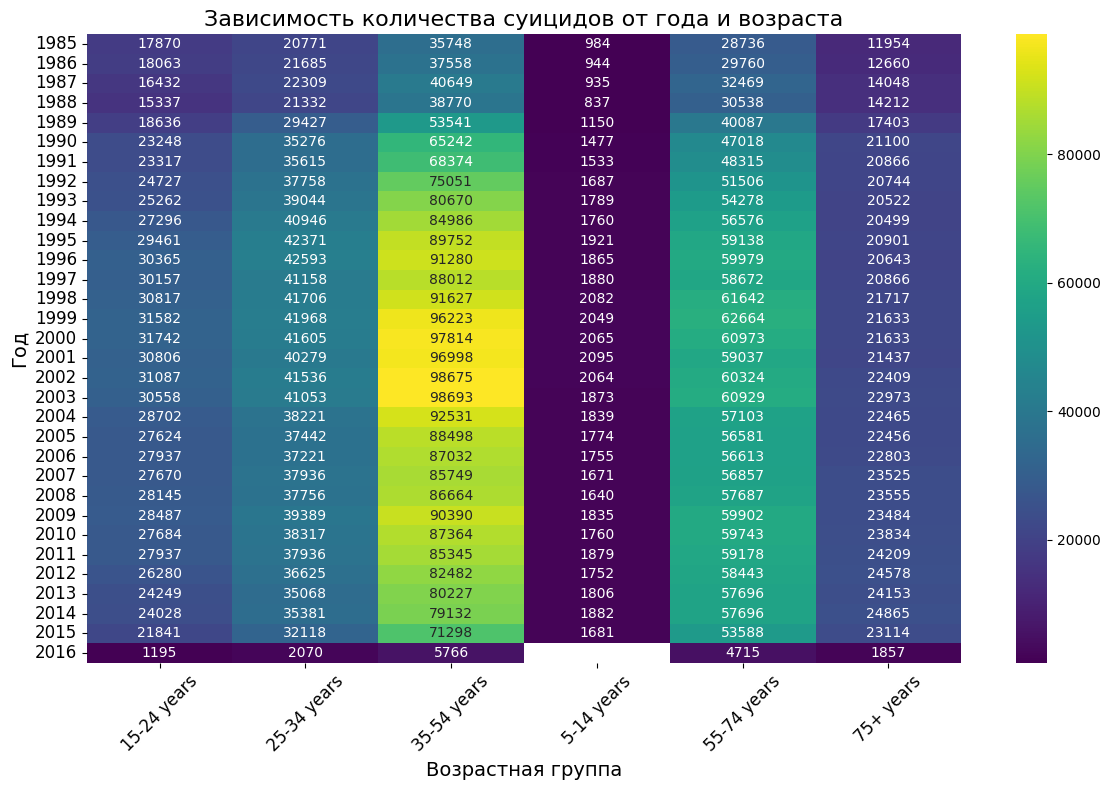

In [52]:
suicides_by_year_age = data.groupby(['year', 'age'])['suicides_no'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(suicides_by_year_age, cmap='viridis', annot=True, fmt='.0f')
plt.title('Зависимость количества суицидов от года и возраста', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Год', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\2736024109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicides_pivot = data.groupby(['year', 'gdp_per_capita_category'])['suicides_no'].sum().unstack()


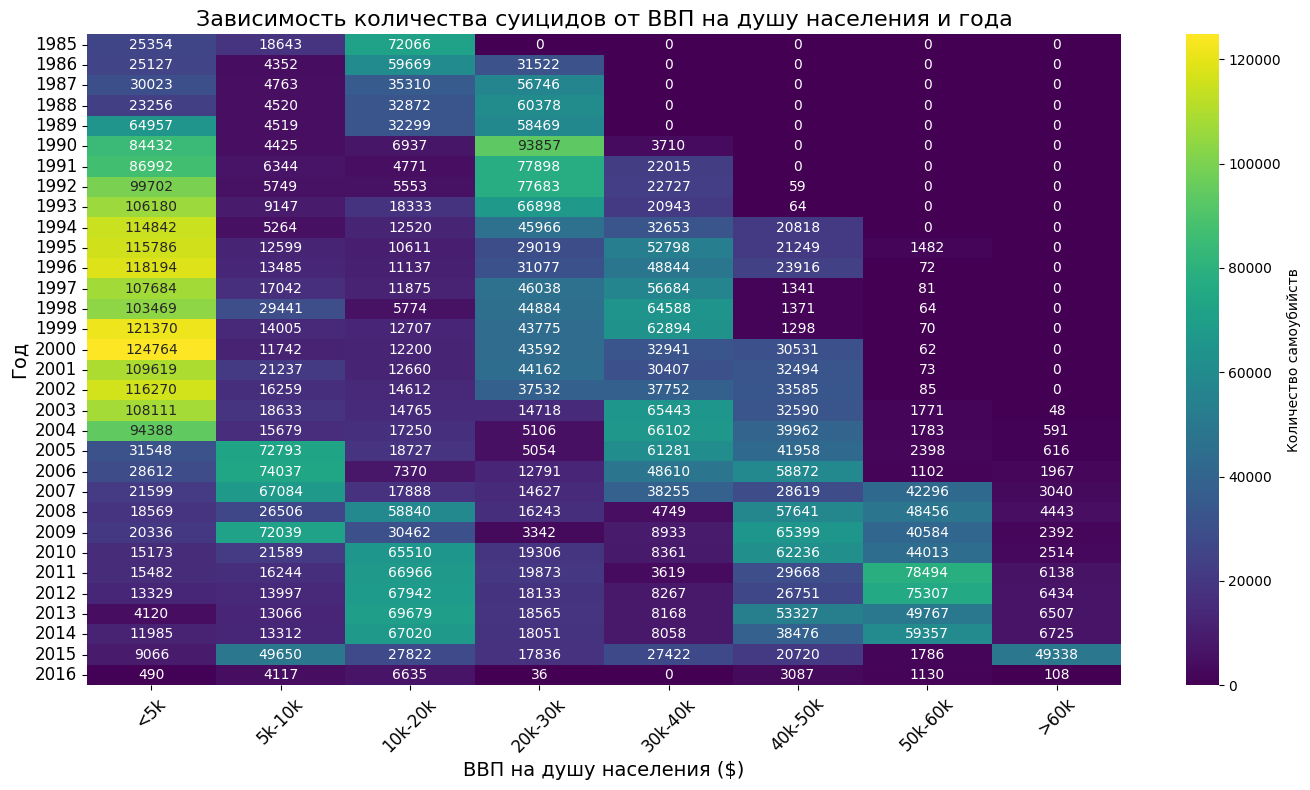

In [53]:
bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
labels = ['<5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '>60k']
data['gdp_per_capita_category'] = pd.cut(data['gdp_per_capita ($)'], bins=bins, labels=labels)
suicides_pivot = data.groupby(['year', 'gdp_per_capita_category'])['suicides_no'].sum().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(suicides_pivot, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Количество самоубийств'})
plt.title('Зависимость количества суицидов от ВВП на душу населения и года', fontsize=16)
plt.xlabel('ВВП на душу населения ($)', fontsize=14)
plt.ylabel('Год', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1915706650.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['year', 'age', 'gdp_per_capita_category'])['suicides_no'].sum().reset_index()
C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\1915706650.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = grouped_data.pivot_table(values='suicides_no', index='year', columns=['age', 'gdp_per_capita_category'], aggfunc='sum')


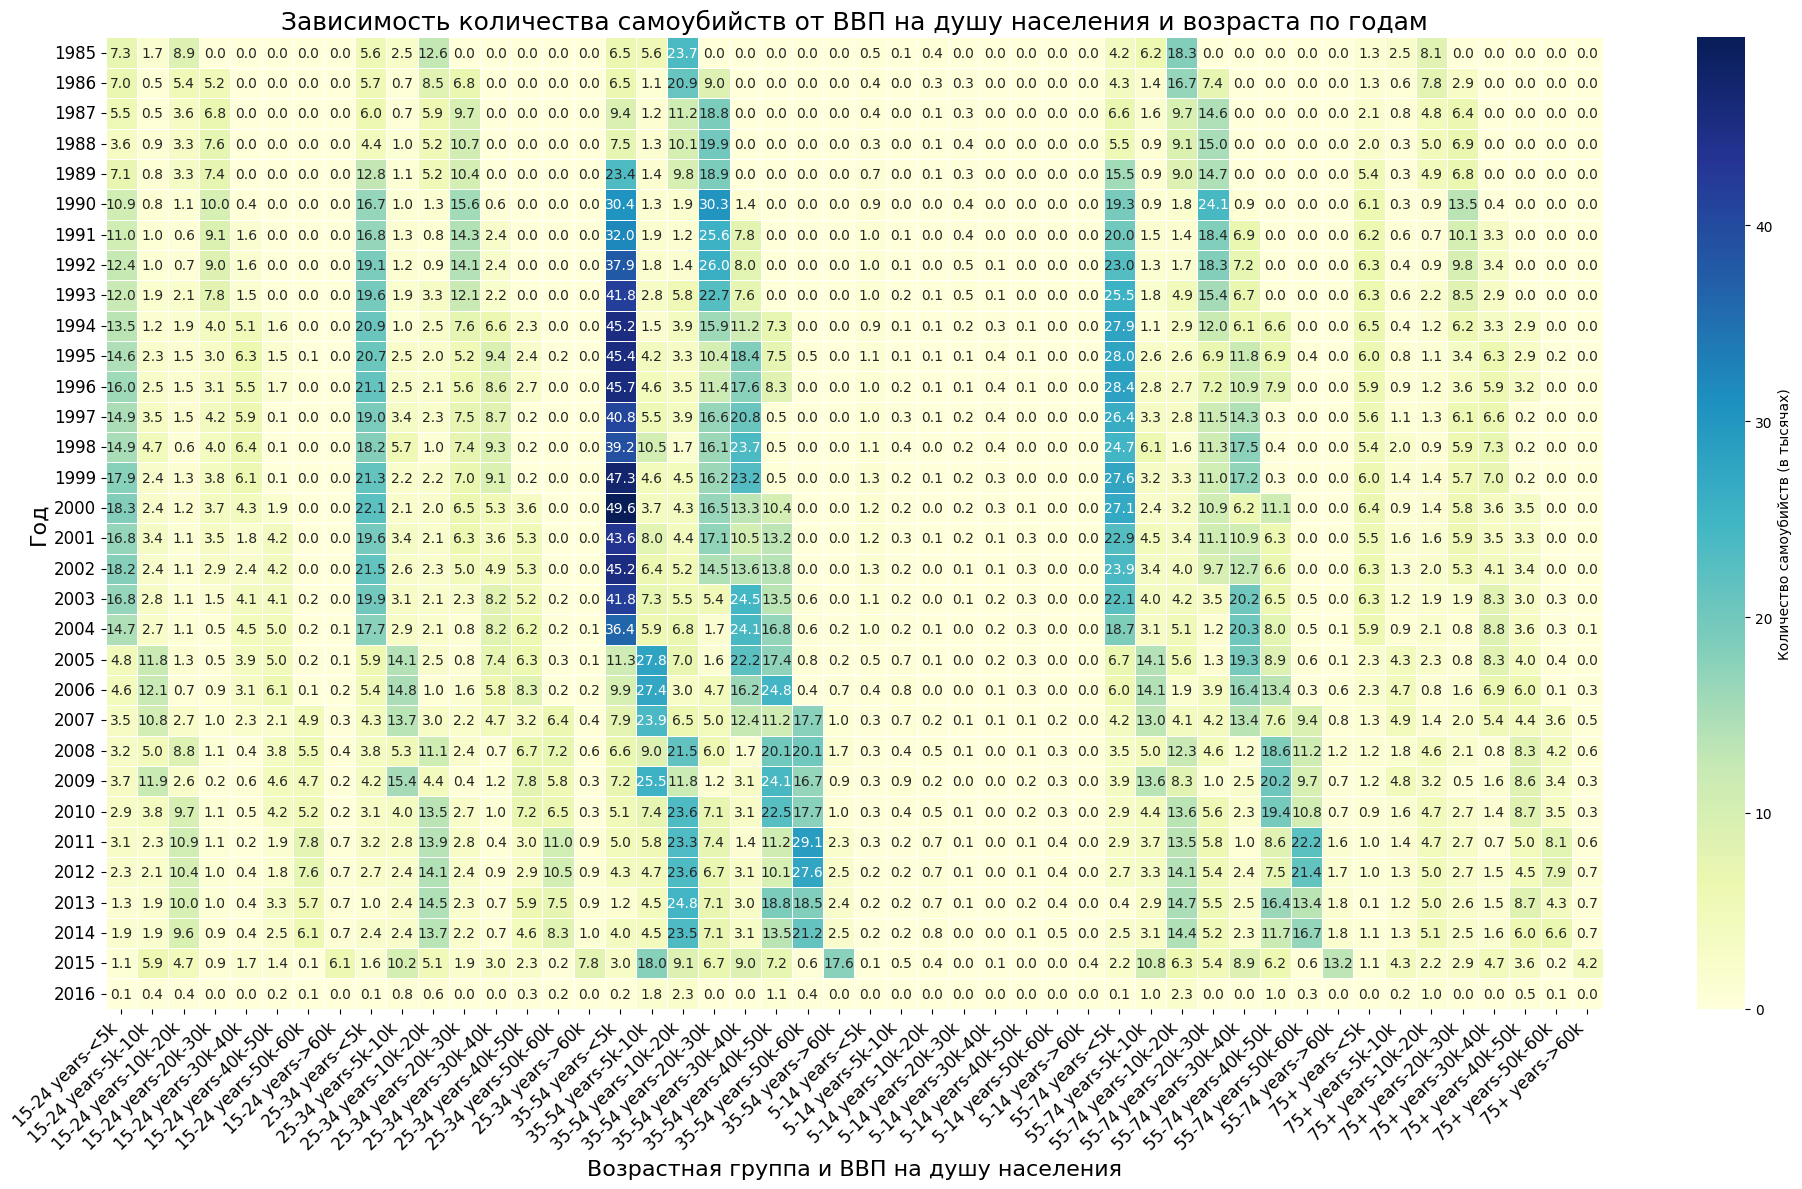

In [54]:
data['gdp_per_capita ($)'] = pd.to_numeric(data['gdp_per_capita ($)'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')
bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
labels = ['<5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '>60k']
data['gdp_per_capita_category'] = pd.cut(data['gdp_per_capita ($)'], bins=bins, labels=labels)
grouped_data = data.groupby(['year', 'age', 'gdp_per_capita_category'])['suicides_no'].sum().reset_index()
grouped_data['suicides_no'] = grouped_data['suicides_no'] / 1000
pivot_table = grouped_data.pivot_table(values='suicides_no', index='year', columns=['age', 'gdp_per_capita_category'], aggfunc='sum')

plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Количество самоубийств (в тысячах)'})
plt.title('Зависимость количества самоубийств от ВВП на душу населения и возраста по годам', fontsize=18)
plt.xlabel('Возрастная группа и ВВП на душу населения', fontsize=16)
plt.ylabel('Год', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Повернем подписи по оси X для лучшей читабельности
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

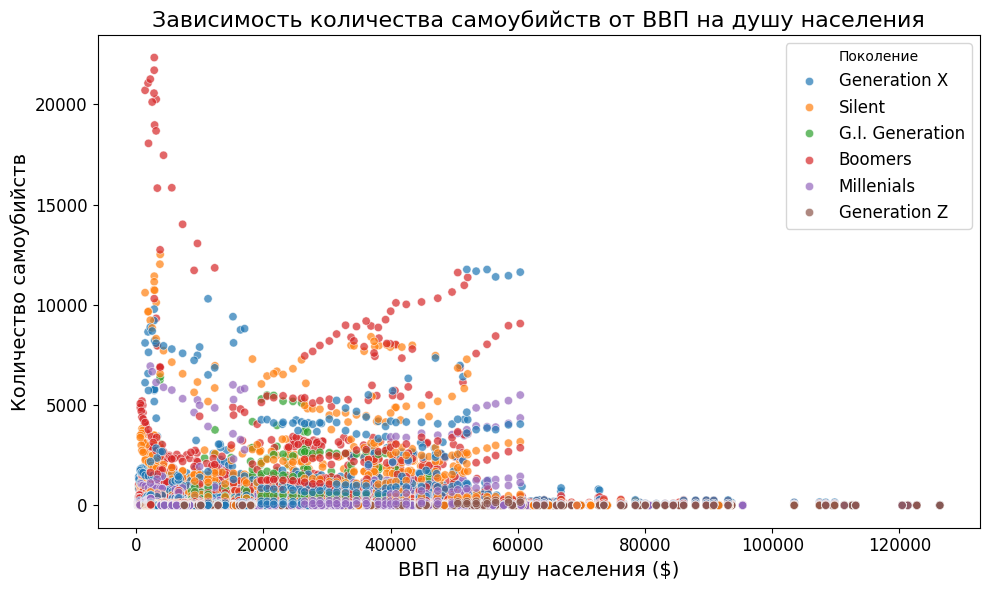

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdp_per_capita ($)', y='suicides_no', hue='generation', alpha=0.7)
plt.title('Зависимость количества самоубийств от ВВП на душу населения', fontsize=16)
plt.xlabel('ВВП на душу населения ($)', fontsize=14)
plt.ylabel('Количество самоубийств', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Поколение', fontsize=12)
plt.tight_layout()
plt.show()

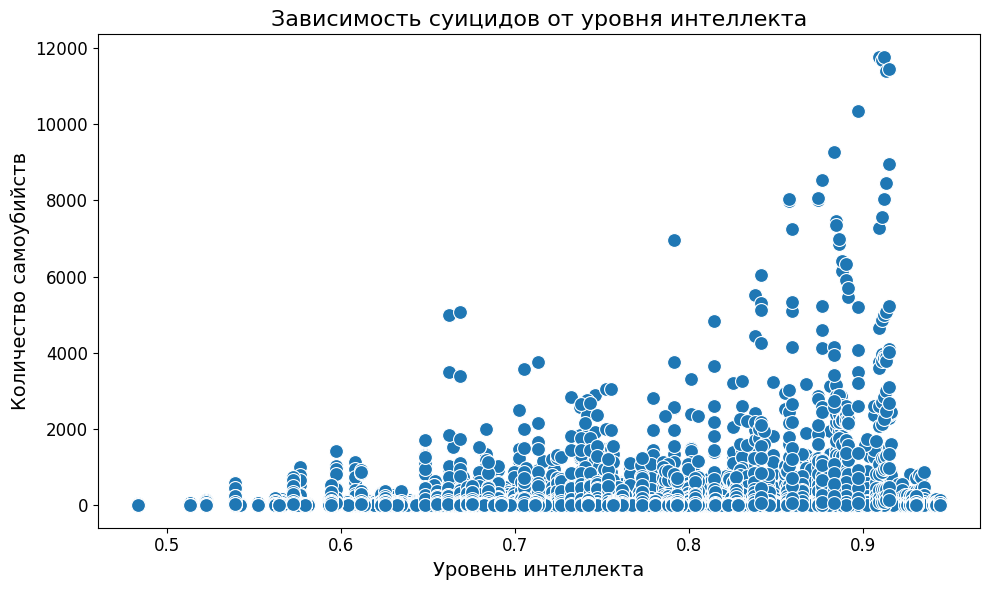

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='HDI for year', y='suicides_no', s=100)
plt.title('Зависимость суицидов от уровня интеллекта', fontsize=16)
plt.xlabel('Уровень интеллекта', fontsize=14)
plt.ylabel('Количество самоубийств', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\4212670842.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdi_age_gen = data.groupby(['generation', 'age'])['HDI for year'].mean().reset_index()
C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\4212670842.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hdi_age_gen, x='age', y='HDI for year', hue='generation', marker='o', palette='viridis', ci=None)


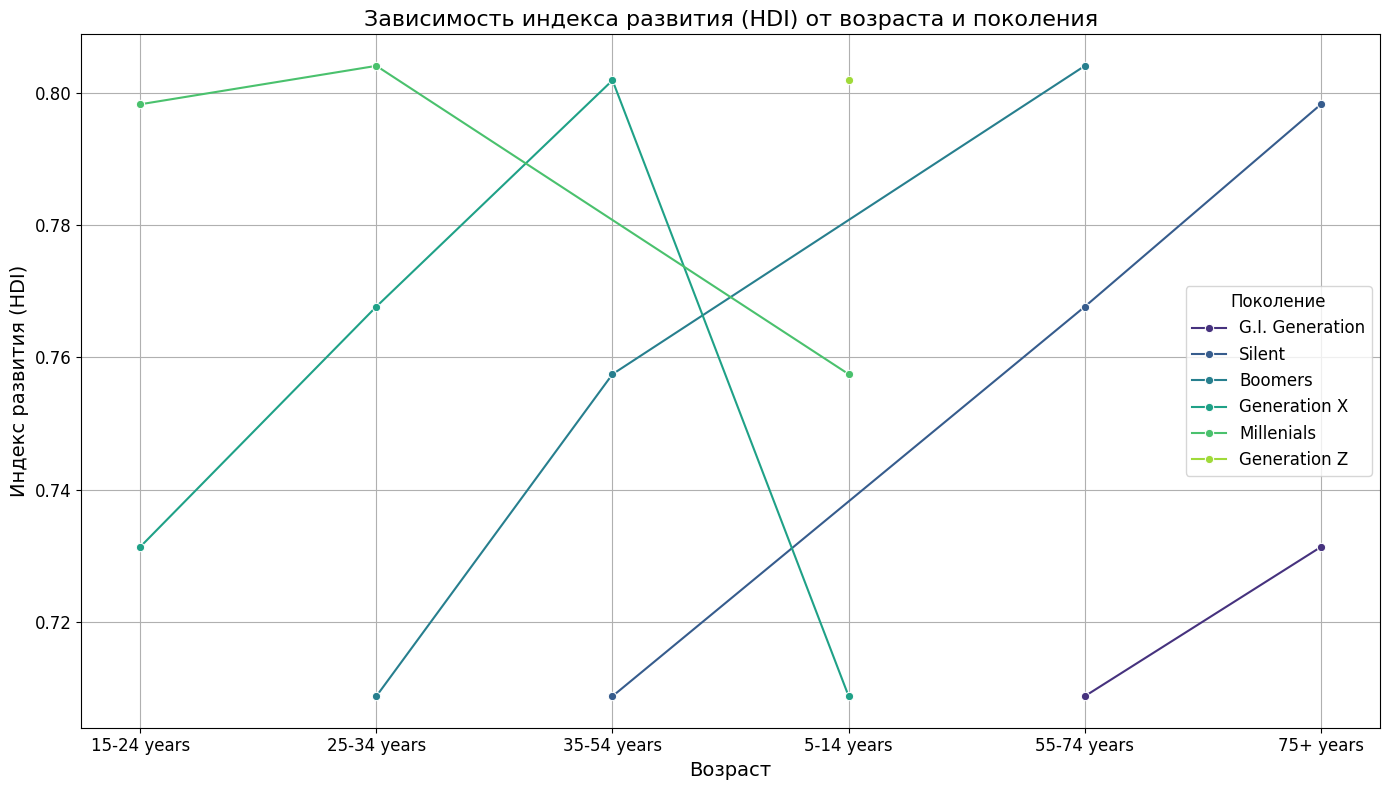

In [57]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']
data['generation'] = pd.Categorical(data['generation'], categories=generation_order, ordered=True)
hdi_age_gen = data.groupby(['generation', 'age'])['HDI for year'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=hdi_age_gen, x='age', y='HDI for year', hue='generation', marker='o', palette='viridis', ci=None)
plt.title('Зависимость индекса развития (HDI) от возраста и поколения', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Индекс развития (HDI)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Поколение', fontsize=12, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Liza\AppData\Local\Temp\ipykernel_8712\3416080787.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  suicides_pivot = data.pivot_table(index='hdi_category', columns='sex', values='suicides_no', aggfunc='sum')


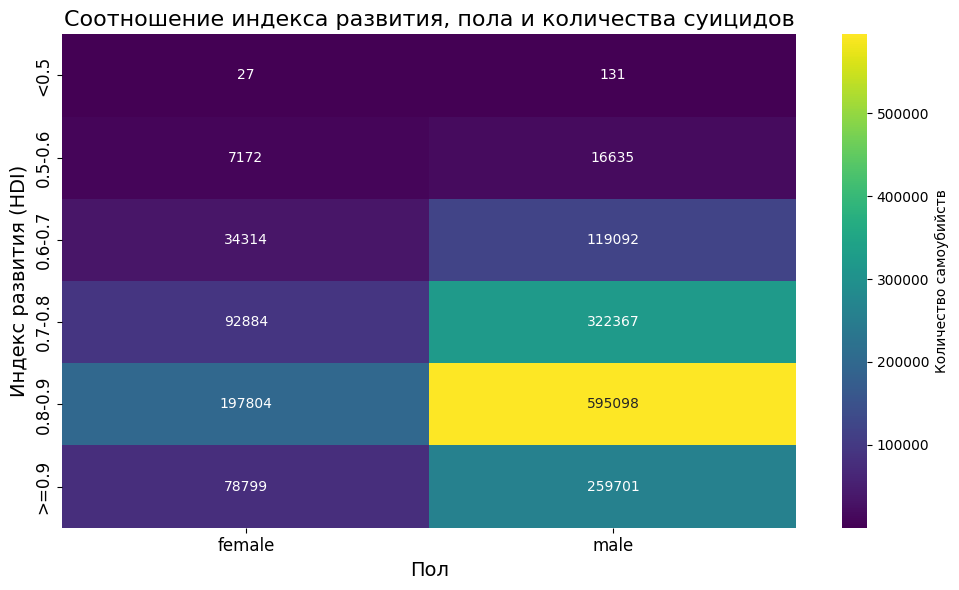

In [58]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')
hdi_bins = [0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hdi_labels = ['<0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '>=0.9']
data['hdi_category'] = pd.cut(data['HDI for year'], bins=hdi_bins, labels=hdi_labels)
suicides_pivot = data.pivot_table(index='hdi_category', columns='sex', values='suicides_no', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(suicides_pivot, annot=True, fmt="d", cmap='viridis', cbar_kws={'label': 'Количество самоубийств'})
plt.title('Соотношение индекса развития, пола и количества суицидов', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Индекс развития (HDI)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()